In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics.pairwise import cosine_similarity

from scipy.sparse.linalg import svds

from sklearn.metrics import mean_squared_error

from scipy.sparse import csr_matrix

from sklearn.cluster import KMeans

from sklearn.metrics import r2_score

import seaborn as sns

In [2]:
#!pip install ml_metrics

In [3]:
import recmetrics
#import ml_metrics
#from ml_metrics import mapk

In [4]:
import time
start_time = time.time()

In [5]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\rajat\Untitled Folder 1


In [6]:
cwd = os.getcwd()
print(cwd)
count_df = pd.read_csv('count_df.csv')
song_df = pd.read_csv('song_df.csv')

C:\Users\rajat\Untitled Folder 1


In [7]:
#View first 10 rows of the count_df dataframe
count_df.head()

,Unnamed: 0,user_id,song_id,listen_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1


In [8]:
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720945 entries, 0 to 720944
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    720945 non-null  int64 
 1   user_id       720945 non-null  object
 2   song_id       720945 non-null  object
 3   listen_count  720945 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 22.0+ MB


In [9]:
count_df.nunique() #counts unique records in each column


Unnamed: 0      720945
user_id          71798
song_id           3778
listen_count       221
dtype: int64

In [10]:
song_df = song_df.drop(columns=['Unnamed: 0'],axis=1)

In [11]:
song_df.head()

,song_id,title,release,artist_name,year
0,SOBXHDL12A81C204C0,Stronger,Graduation,Kanye West,2007
1,SOBYHAJ12A6701BF1D,Constellations,In Between Dreams,Jack Johnson,2005
2,SODACBL12A8C13C273,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
3,SODXRTY12AB0180F3B,Paper Gangsta,The Fame Monster,Lady GaGa,2008
4,SOFGUAY12AB017B0A8,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999


In [12]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720945 entries, 0 to 720944
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   song_id      720945 non-null  object
 1   title        720945 non-null  object
 2   release      720945 non-null  object
 3   artist_name  720945 non-null  object
 4   year         720945 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 27.5+ MB


In [13]:

#Let's check null records / Nan "title" - 15 records
null_title_records = song_df.loc[song_df["title"].isna()]
null_title_records

,song_id,title,release,artist_name,year


In [14]:
null_release_records = song_df.loc[song_df["release"].isna()]
null_release_records

,song_id,title,release,artist_name,year


In [15]:
duplicate_songs_from_file = song_df[song_df.duplicated(subset=['song_id'],keep=False)]
duplicate_songs_from_file

,song_id,title,release,artist_name,year
0,SOBXHDL12A81C204C0,Stronger,Graduation,Kanye West,2007
1,SOBYHAJ12A6701BF1D,Constellations,In Between Dreams,Jack Johnson,2005
2,SODACBL12A8C13C273,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
3,SODXRTY12AB0180F3B,Paper Gangsta,The Fame Monster,Lady GaGa,2008
4,SOFGUAY12AB017B0A8,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...
720940,SOHBPAS12A58A7EB59,Come Back to Me,David Cook,David Cook,2008
720941,SOHQFLV12A6D4F863A,You Could Be Happy,Eyes Open,Snow Patrol,2006
720942,SOHZPIK12A58A7CCAE,Te Amo,Rated R,Rihanna,2009
720943,SOIOESO12A6D4F621D,Unwell (Album Version),More Than You Think You Are,matchbox twenty,2003


In [16]:
song_df[song_df['song_id'] == "SOJEYPO12AAA8C6B0E"]

,song_id,title,release,artist_name,year
6987,SOJEYPO12AAA8C6B0E,Ignorance (Album Version),Ignorance,Paramore,0
9384,SOJEYPO12AAA8C6B0E,Ignorance (Album Version),Ignorance,Paramore,0
9778,SOJEYPO12AAA8C6B0E,Ignorance (Album Version),Ignorance,Paramore,0
12486,SOJEYPO12AAA8C6B0E,Ignorance (Album Version),Ignorance,Paramore,0
15802,SOJEYPO12AAA8C6B0E,Ignorance (Album Version),Ignorance,Paramore,0
...,...,...,...,...,...
714585,SOJEYPO12AAA8C6B0E,Ignorance (Album Version),Ignorance,Paramore,0
715197,SOJEYPO12AAA8C6B0E,Ignorance (Album Version),Ignorance,Paramore,0
716962,SOJEYPO12AAA8C6B0E,Ignorance (Album Version),Ignorance,Paramore,0
719155,SOJEYPO12AAA8C6B0E,Ignorance (Album Version),Ignorance,Paramore,0


In [17]:
song_df.sort_values(by = ["song_id", "year"])

,song_id,title,release,artist_name,year
2821,SOAAEJI12AB0188AB5,Godlovesugly,God Loves Ugly,Atmosphere,0
10359,SOAAEJI12AB0188AB5,Godlovesugly,God Loves Ugly,Atmosphere,0
13495,SOAAEJI12AB0188AB5,Godlovesugly,God Loves Ugly,Atmosphere,0
21500,SOAAEJI12AB0188AB5,Godlovesugly,God Loves Ugly,Atmosphere,0
25754,SOAAEJI12AB0188AB5,Godlovesugly,God Loves Ugly,Atmosphere,0
...,...,...,...,...,...
673177,SOZZYAO12A6701FF36,Sunset (Bird Of Prey),Halfway Between The Gutter And The Stars,Fatboy Slim,2000
683661,SOZZYAO12A6701FF36,Sunset (Bird Of Prey),Halfway Between The Gutter And The Stars,Fatboy Slim,2000
687672,SOZZYAO12A6701FF36,Sunset (Bird Of Prey),Halfway Between The Gutter And The Stars,Fatboy Slim,2000
709195,SOZZYAO12A6701FF36,Sunset (Bird Of Prey),Halfway Between The Gutter And The Stars,Fatboy Slim,2000


In [18]:
song_df_cleaned_by_year = song_df.drop_duplicates(["song_id"], keep = "last")
song_df_cleaned_by_year

,song_id,title,release,artist_name,year
657582,SOFEBZH12AB017FB35,Que Lloro,Hasta Ahora,Sin Bandera,2007
661706,SONQQMT12A8C13711A,Shh,Details,Frou Frou,2002
667021,SOJVZFM12A8C1401CF,This Is Nowhere,The Airborne Toxic Event,The Airborne Toxic Event,2008
668268,SOGSQOK12A8C1438A5,Happiness Is Overrated,The Airborne Toxic Event,The Airborne Toxic Event,2008
671367,SOTCJRN12A58A81206,Reality Check,Masters Of The Universe,Binary Star,1999
...,...,...,...,...,...
720940,SOHBPAS12A58A7EB59,Come Back to Me,David Cook,David Cook,2008
720941,SOHQFLV12A6D4F863A,You Could Be Happy,Eyes Open,Snow Patrol,2006
720942,SOHZPIK12A58A7CCAE,Te Amo,Rated R,Rihanna,2009
720943,SOIOESO12A6D4F621D,Unwell (Album Version),More Than You Think You Are,matchbox twenty,2003


In [19]:
#Check the data types of each column of the song_df_cleaned_by_year dataframe. Hint: Use info() method
song_df_cleaned_by_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3778 entries, 657582 to 720944
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   song_id      3778 non-null   object
 1   title        3778 non-null   object
 2   release      3778 non-null   object
 3   artist_name  3778 non-null   object
 4   year         3778 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 177.1+ KB


In [20]:
#checking how many records for each year in the cleaned song database
pd.concat([song_df_cleaned_by_year.year.value_counts(), song_df_cleaned_by_year.year.value_counts()/len(song_df_cleaned_by_year)], axis = 1).set_axis(["Count_Play", "%% In Total"], axis = 1, inplace = False)

,Count_Play,%% In Total
2007,367,0.097141
0,358,0.094759
2008,346,0.091583
2009,332,0.087877
2006,303,0.080201
2005,269,0.071202
2003,228,0.060349
2004,165,0.043674
2010,162,0.042880
2002,158,0.041821


<AxesSubplot:xlabel='year', ylabel='Count'>

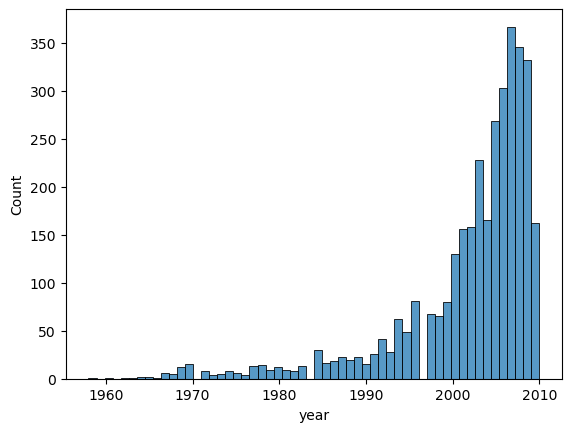

In [21]:
#Here I am plotting number of UNIQUE songs BY YEAR without year == "0" - from the cleaned song database
song_df_clean_non_null_years = song_df_cleaned_by_year.drop(index = song_df_cleaned_by_year[song_df_cleaned_by_year["year"] == 0].index)

sns.histplot(song_df_clean_non_null_years.year)

In [22]:
song_df_clean_non_null_years


,song_id,title,release,artist_name,year
657582,SOFEBZH12AB017FB35,Que Lloro,Hasta Ahora,Sin Bandera,2007
661706,SONQQMT12A8C13711A,Shh,Details,Frou Frou,2002
667021,SOJVZFM12A8C1401CF,This Is Nowhere,The Airborne Toxic Event,The Airborne Toxic Event,2008
668268,SOGSQOK12A8C1438A5,Happiness Is Overrated,The Airborne Toxic Event,The Airborne Toxic Event,2008
671367,SOTCJRN12A58A81206,Reality Check,Masters Of The Universe,Binary Star,1999
...,...,...,...,...,...
720939,SOGTQNI12AB0184A5C,Vanilla Twilight,Ocean Eyes,Owl City,2009
720940,SOHBPAS12A58A7EB59,Come Back to Me,David Cook,David Cook,2008
720941,SOHQFLV12A6D4F863A,You Could Be Happy,Eyes Open,Snow Patrol,2006
720942,SOHZPIK12A58A7CCAE,Te Amo,Rated R,Rihanna,2009


In [23]:
#checking how many records for each NON-"0" year in the cleaned song database
pd.concat([song_df_clean_non_null_years.year.value_counts(), song_df_clean_non_null_years.year.value_counts()/len(song_df_clean_non_null_years)], axis = 1).set_axis(["Count_Play", "%% In Total"], axis = 1, inplace = False)

,Count_Play,%% In Total
2007,367,0.107310
2008,346,0.101170
2009,332,0.097076
2006,303,0.088596
2005,269,0.078655
2003,228,0.066667
2004,165,0.048246
2010,162,0.047368
2002,158,0.046199
2001,156,0.045614


In [24]:
song_df_clean_non_null_years.describe().T #unique songs with year =! 0

,count,mean,std,min,25%,50%,75%,max
year,3420.0,2002.012281,8.31156,1958.0,2000.0,2005.0,2007.0,2010.0


In [25]:
df = pd.merge(count_df, song_df_cleaned_by_year, on="song_id", how="left")
df = df.drop(['Unnamed: 0'],axis=1)
df

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
720940,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOHBPAS12A58A7EB59,2,Come Back to Me,David Cook,David Cook,2008
720941,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOHQFLV12A6D4F863A,2,You Could Be Happy,Eyes Open,Snow Patrol,2006
720942,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOHZPIK12A58A7CCAE,4,Te Amo,Rated R,Rihanna,2009
720943,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOIOESO12A6D4F621D,4,Unwell (Album Version),More Than You Think You Are,matchbox twenty,2003


In [26]:
le = LabelEncoder()
df['user_id'] = le.fit_transform(df['user_id'])

In [27]:
#Similarly, do the label encoding for the song_id column
df['song_id'] = le.fit_transform(df['song_id'])

In [28]:
df

,user_id,song_id,listen_count,title,release,artist_name,year
0,51732,279,1,Stronger,Graduation,Kanye West,2007
1,51732,283,1,Constellations,In Between Dreams,Jack Johnson,2005
2,51732,439,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
3,51732,568,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008
4,51732,780,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
720940,60759,1081,2,Come Back to Me,David Cook,David Cook,2008
720941,60759,1167,2,You Could Be Happy,Eyes Open,Snow Patrol,2006
720942,60759,1219,4,Te Amo,Rated R,Rihanna,2009
720943,60759,1298,4,Unwell (Album Version),More Than You Think You Are,matchbox twenty,2003


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720945 entries, 0 to 720944
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       720945 non-null  int32 
 1   song_id       720945 non-null  int32 
 2   listen_count  720945 non-null  int64 
 3   title         720945 non-null  object
 4   release       720945 non-null  object
 5   artist_name   720945 non-null  object
 6   year          720945 non-null  int64 
dtypes: int32(2), int64(2), object(3)
memory usage: 38.5+ MB


In [30]:
# Let's count how many records in the merged table by year.
df2 = df["year"].value_counts()/2000000
years_table = pd.concat([df["year"].value_counts(), df2, df2.cumsum()], axis = 1)
years_table = years_table.set_axis(['Num of Years', '%% of this year', "Cumulative %%"], axis=1, inplace=False)
print("Number of rows in this YEAR table is:", len(years_table))
years_table

Number of rows in this YEAR table is: 52


,Num of Years,%% of this year,Cumulative %%
2009,84857,0.042429,0.042429
2008,78651,0.039325,0.081754
0,69207,0.034604,0.116358
2007,67376,0.033688,0.150045
2006,47061,0.023530,0.173576
2005,42779,0.021389,0.194966
2003,42031,0.021015,0.215981
2002,35395,0.017698,0.233679
2000,27771,0.013886,0.247564
2010,26827,0.013414,0.260978


<AxesSubplot:xlabel='year', ylabel='Count'>

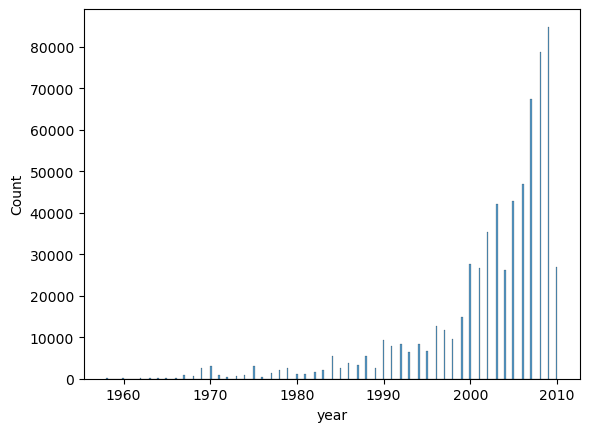

In [31]:
#Here I am plotting number of UNIQUE songs with year != 0 - from df
song_df_non_null_years = df.drop(index = df[df["year"] == 0].index)
sns.histplot(song_df_non_null_years.year)

<AxesSubplot:xlabel='year', ylabel='song_id'>

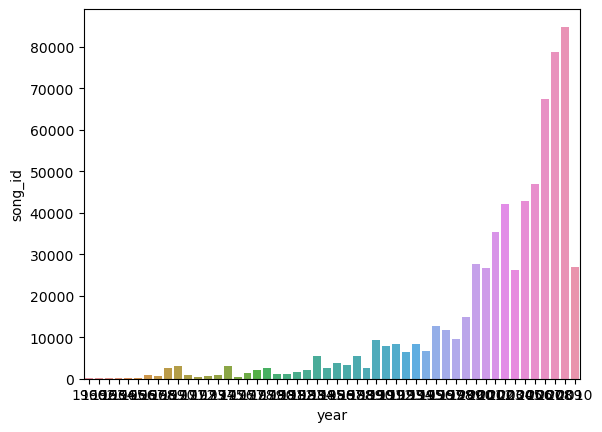

In [32]:
#OR
#Plot a barplot to visualize the count of songs played each year
#Songs played in a year
count_songs = song_df_non_null_years.groupby(["year"]).count()["song_id"]
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace=True)
count = count.reset_index()
count.head()
sns.barplot(x = 'year', y = "song_id", data = count)

In [33]:
# Let's count how many records in the merged table by year - for NON-"0" years
df3 = song_df_non_null_years["year"].value_counts()/len(song_df_non_null_years)
years_table2 = pd.concat([song_df_non_null_years["year"].value_counts(), df3, df3.cumsum()], axis = 1)
years_table2 = years_table2.set_axis(['Num of Years', '%% of this year', "Cumulative %%"], axis=1, inplace=False)
print("Number of rows in this YEAR table is:", len(years_table2))
years_table2

Number of rows in this YEAR table is: 51


,Num of Years,%% of this year,Cumulative %%
2009,84857,0.130201,0.130201
2008,78651,0.120679,0.250880
2007,67376,0.103379,0.354259
2006,47061,0.072208,0.426467
2005,42779,0.065638,0.492106
2003,42031,0.064491,0.556596
2002,35395,0.054309,0.610905
2000,27771,0.042611,0.653516
2010,26827,0.041162,0.694678
2001,26597,0.040809,0.735487


In [34]:
#Check the most interacted songs by using the title column. Hint: Use value_counts() method
df["title"].value_counts()

You're The One            6729
Revelry                   6145
Secrets                   5841
Use Somebody              3976
The Scientist             3372
                          ... 
Dream Of Mirrors            56
Dance Hall                  55
El Justiciero               54
A Deeper Shade Of Soul      54
The Worm                    52
Name: title, Length: 3694, dtype: int64

In [35]:
#Check the most interacted songs by using the song_id column. Hint: Use value_counts() method
songs_interaction = df["song_id"].value_counts()
songs_interaction

230     6412
2808    6145
2080    5841
3236    3976
1583    3372
        ... 
2677      56
1088      55
1837      54
3621      54
163       52
Name: song_id, Length: 3778, dtype: int64

In [36]:
songs_played = df.groupby(['song_id']).agg({'listen_count': 'sum'})

songs_played = songs_played.sort_values("listen_count", ascending=False)

#df = df.drop("new_play_count"], axis=1)

songs_played

,listen_count
song_id,
230,54136
2808,41418
2080,22100
2991,11371
3236,11070
...,...
275,82
2917,82
2356,82


Text(0, 0.5, 'Number of Interactions')

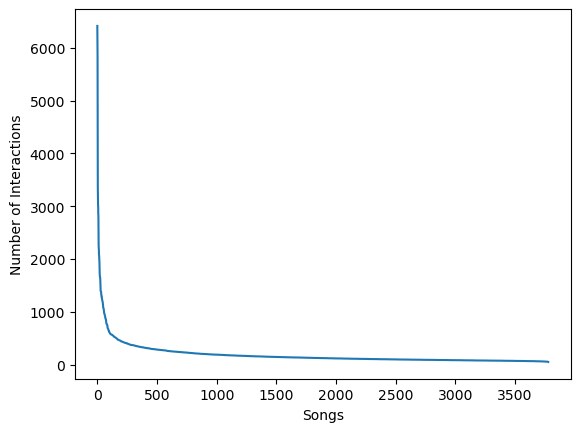

In [37]:
p = plt.plot(songs_interaction.values)
plt.xlabel("Songs")
plt.ylabel("Number of Interactions")

In [38]:
songs_interaction.head(57)

230     6412
2808    6145
2080    5841
3236    3976
1583    3372
414     3139
2685    3032
1756    3009
2325    2839
2361    2829
3001    2316
3196    2253
3508    2224
76      2171
3247    2076
1993    2070
3472    2029
2222    1988
119     1924
3261    1783
3014    1715
2777    1662
2732    1658
3457    1655
1040    1649
2351    1592
2991    1481
2769    1458
3559    1395
2651    1391
2801    1385
1229    1381
181     1372
1627    1322
517     1320
105     1318
2195    1275
2396    1275
687     1267
1899    1242
3377    1233
1819    1219
2743    1213
3017    1205
1877    1198
497     1184
2157    1168
1283    1135
460     1133
279     1082
1312    1079
648     1072
1219    1070
732     1059
873     1043
151     1038
3556    1010
Name: song_id, dtype: int64

In [39]:
songs_interaction.tail(8000)

230     6412
2808    6145
2080    5841
3236    3976
1583    3372
        ... 
2677      56
1088      55
1837      54
3621      54
163       52
Name: song_id, Length: 3778, dtype: int64

In [40]:
songs_interaction.tail(8000)

230     6412
2808    6145
2080    5841
3236    3976
1583    3372
        ... 
2677      56
1088      55
1837      54
3621      54
163       52
Name: song_id, Length: 3778, dtype: int64

In [41]:
#Let's filter our df by the song title "You're The One" and see if our assumption that 
#there can be several different songs (song_id-s) with the same title is correct.

df_with_the_song_Youre_The_One = df[df["title"]=="You're The One"]
df_with_the_song_Youre_The_One.head(20)


,user_id,song_id,listen_count,title,release,artist_name,year
31,62725,230,2,You're The One,If There Was A Way,Dwight Yoakam,1990
123,60077,230,26,You're The One,If There Was A Way,Dwight Yoakam,1990
251,25477,2232,1,You're The One,Magic Potion,The Black Keys,2006
443,3025,230,8,You're The One,If There Was A Way,Dwight Yoakam,1990
563,12165,230,2,You're The One,If There Was A Way,Dwight Yoakam,1990
696,32436,230,1,You're The One,If There Was A Way,Dwight Yoakam,1990
748,43256,230,58,You're The One,If There Was A Way,Dwight Yoakam,1990
775,51404,230,2,You're The One,If There Was A Way,Dwight Yoakam,1990
901,17889,230,5,You're The One,If There Was A Way,Dwight Yoakam,1990
1037,27748,230,2,You're The One,If There Was A Way,Dwight Yoakam,1990


In [42]:
#Check unique users with the most interaction by using the user_id column. Hint: Use value_counts() method
users_interactions = df["user_id"].value_counts()
#users_interactions = users_interactions.set_axis(['user_id', 'num_of_interactions'], axis=1, inplace=False)
users_interactions


30675    316
10192    291
6117     268
70665    257
46579    251
        ... 
70206      1
16425      1
4348       1
26849      1
1245       1
Name: user_id, Length: 71798, dtype: int64

In [43]:
users_interactions.head(764)

30675    316
10192    291
6117     268
70665    257
46579    251
        ... 
22681     66
5181      66
39578     66
43966     66
26496     66
Name: user_id, Length: 764, dtype: int64

In [44]:
users_interactions.tail(50000)

49264    10
60054    10
15772    10
27066    10
46728    10
         ..
70206     1
16425     1
4348      1
26849     1
1245      1
Name: user_id, Length: 50000, dtype: int64

Text(0, 0.5, 'Number of Interactions')

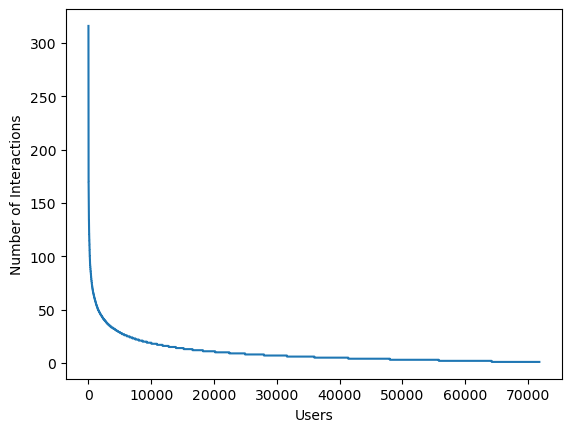

In [45]:
p = plt.plot(users_interactions.values)
plt.xlabel("Users")
plt.ylabel("Number of Interactions")

In [46]:
# Check unique artists with the most interaction by using the artist_name column. Hint: Use value_counts() method
artists = df["artist_name"].value_counts()
artists

Coldplay           17681
Kings Of Leon      13568
Jack Johnson       13134
The Black Keys     12336
Metallica           9514
                   ...  
Fleetwood Mac         57
Feargal Sharkey       56
Damian Marley         56
Shotta                54
Ray Barretto          54
Name: artist_name, Length: 1100, dtype: int64

In [47]:
#Check unique artists with the most interaction by using the artist_name column. Hint: Use value_counts() method
releases = df["release"].value_counts()
releases

Only By The Night              7899
Lungs                          7425
The Fame Monster               7042
Waking Up                      6878
A Rush Of Blood To The Head    6422
                               ... 
Zimmer 483                       56
Clash On Broadway                56
Feargal Sharkey                  56
Sangre                           54
Acid                             54
Name: release, Length: 1822, dtype: int64

In [48]:
artists1 = df.groupby(["artist_name","year","release"]).count()
artists1.sort_values(by=["listen_count"])
artists1.tail(20)

user_id  song_id  \
artist_name          year release                                              
Zero 7               2001 Simple Things                         779      779   
                     2004 Milton At Midnight                    124      124   
                          When It Falls                          78       78   
                     2009 Yeah Ghost                            102      102   
Ziggy Marley         2003 Dragonfly                             390      390   
Zombie Nation        1999 Kernkraft 400 Single Mixes            127      127   
dEUS                 1994 Worst Case Scenario                   145      145   
iio                  2001 Poetica                                62       62   
matchbox twenty      1996 Yourself Or Someone Like You          487      487   
                     2000 Mad Season                             89       89   
                     2002 More Than You Think You Are           315      315   
                     2003 More Than You Think You Are           618      618   
                     2007 Exile On Mainstream                   659      659   
moe.                 1996 No Doy                                136      136   
the bird and the bee 2006 the bird and the bee                  637      637   
                     2007 the bird and the bee                  330      330   
                     2008 One Too Many Hearts                   273      273   
                          Ray Guns Are Not Just The Future      314      314   
                     2009 Ray Guns Are Not Just The Future     3177     3177   
themselves           2009 Crownsdown                            108      108   

                                                            listen_count  \
artist_name          year release                                          
Zero 7               2001 Simple Things                              779   
                     2004 Milton At Midnight                         124   
                          When It Falls                               78   
                     2009 Yeah Ghost                                 102   
Ziggy Marley         2003 Dragonfly                                  390   
Zombie Nation        1999 Kernkraft 400 Single Mixes                 127   
dEUS                 1994 Worst Case Scenario                        145   
iio                  2001 Poetica                                     62   
matchbox twenty      1996 Yourself Or Someone Like You               487   
                     2000 Mad Season                                  89   
                     2002 More Than You Think You Are                315   
                     2003 More Than You Think You Are                618   
                     2007 Exile On Mainstream                        659   
moe.                 1996 No Doy                                     136   
the bird and the bee 2006 the bird and the bee                       637   
                     2007 the bird and the bee                       330   
                     2008 One Too Many Hearts                        273   
                          Ray Guns Are Not Just The Future           314   
                     2009 Ray Guns Are Not Just The Future          3177   
themselves           2009 Crownsdown                                 108   

                                                            title  
artist_name          year release                                  
Zero 7               2001 Simple Things                       779  
                     2004 Milton At Midnight                  124  
                          When It Falls                        78  
                     2009 Yeah Ghost                          102  
Ziggy Marley         2003 Dragonfly                           390  
Zombie Nation        1999 Kernkraft 400 Single Mixes          127  
dEUS                 1994 Worst Case Scenario                 145  
iio           

In [49]:
artists_by_years = song_df_non_null_years.groupby(["year","artist_name"]).count()
artists_by_years.head(30)

user_id  song_id  listen_count  title  \
year artist_name                                                           
1958 Nina Simone                        70       70            70     70   
1960 Buddy Holly                       171      171           171    171   
1962 The Dells                         276      276           276    276   
1963 The Kingsmen                      172      172           172    172   
1964 Dusty Springfield                  66       66            66     66   
     The Beach Boys                     80       80            80     80   
1965 The Animals                       114      114           114    114   
     The Kinks                         112      112           112    112   
1966 Bob Dylan                         101      101           101    101   
1967 Buffalo Springfield               228      228           228    228   
     Cat Stevens                       202      202           202    202   
     Leonard Cohen                     293      293           293    293   
     The Kinks                         108      108           108    108   
     The Turtles                       135      135           135    135   
1968 Bobby Goldsboro                    88       88            88     88   
     Creedence Clearwater Revival      135      135           135    135   
     Fleetwood Mac                      57       57            57     57   
     Joe Cocker                        290      290           290    290   
     Ray Barretto                       54       54            54     54   
1969 Creedence Clearwater Revival     1944     1944          1944   1944   
     Elvis Presley                     174      174           174    174   
     Grand Funk Railroad                67       67            67     67   
     Jimi Hendrix                      143      143           143    143   
     Nick Drake                         59       59            59     59   
     Ten Years After                   123      123           123    123   
     The Doors                          99       99            99     99   
1970 Black Sabbath                      76       76            76     76   
     Carpenters                        504      504           504    504   
     Cat Stevens                       781      781           781    781   
     Creedence Clearwater Revival      697      697           697    697   

                                   release  
year artist_name                            
1958 Nina Simone                        70  
1960 Buddy Holly                       171  
1962 The Dells                         276  
1963 The Kingsmen                      172  
1964 Dusty Springfield                  66  
     The Beach Boys                     80  
1965 The Animals                       114  
     The Kinks                         112  
1966 Bob Dylan                         101  
1967 Buffalo Springfield               228  
     Cat Stevens                       202  
     Leonard Cohen                     293  
     The Kinks                         108  
     The Turtles                       135  
1968 Bobby Goldsboro                    88  
     Creedence Clearwater Revival      135  
     Fleetwood Mac                      57  
     Joe Cocker                        290  
     Ray Barretto                       54  
1969 Creedence Clearwater Revival     1944  
     Elvis Presley                     174  
     Grand Funk Railroad                67  
     Jimi Hendrix                      143  
     Nick Drake                         59  
     Ten Years After                   123  
     The Doors                          99  
1970 Black Sabbath                      76  
     Carpenters                        504  
     Cat Stevens                       781  
     Creedence Clearwater Revival      697

In [50]:
## I am gouping by song_id, not by title, as song_id is unique for the song, title is not unique.
play_count = df.groupby(["song_id"]).count() #Hint: Use groupby function on the title column
count_sum = df.groupby(["song_id"]).sum() #Hint: Use groupby function on the title column

In [51]:
df

,user_id,song_id,listen_count,title,release,artist_name,year
0,51732,279,1,Stronger,Graduation,Kanye West,2007
1,51732,283,1,Constellations,In Between Dreams,Jack Johnson,2005
2,51732,439,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
3,51732,568,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008
4,51732,780,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
720940,60759,1081,2,Come Back to Me,David Cook,David Cook,2008
720941,60759,1167,2,You Could Be Happy,Eyes Open,Snow Patrol,2006
720942,60759,1219,4,Te Amo,Rated R,Rihanna,2009
720943,60759,1298,4,Unwell (Album Version),More Than You Think You Are,matchbox twenty,2003


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720945 entries, 0 to 720944
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       720945 non-null  int32 
 1   song_id       720945 non-null  int32 
 2   listen_count  720945 non-null  int64 
 3   title         720945 non-null  object
 4   release       720945 non-null  object
 5   artist_name   720945 non-null  object
 6   year          720945 non-null  int64 
dtypes: int32(2), int64(2), object(3)
memory usage: 54.6+ MB


In [53]:
play_count.head()

,user_id,listen_count,title,release,artist_name,year
song_id,,,,,,
0,62,62,62,62,62,62
1,190,190,190,190,190,190
2,66,66,66,66,66,66
3,86,86,86,86,86,86
4,130,130,130,130,130,130


In [54]:
play_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3778 entries, 0 to 3777
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   user_id       3778 non-null   int64
 1   listen_count  3778 non-null   int64
 2   title         3778 non-null   int64
 3   release       3778 non-null   int64
 4   artist_name   3778 non-null   int64
 5   year          3778 non-null   int64
dtypes: int64(6)
memory usage: 206.6 KB


In [55]:
count_sum.head()

,user_id,listen_count,year
song_id,,,
0,2234138,131,0
1,7071498,405,380000
2,2572944,215,129624
3,2950019,131,172774
4,4652412,366,257140


In [56]:
count_sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3778 entries, 0 to 3777
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   user_id       3778 non-null   int32
 1   listen_count  3778 non-null   int64
 2   year          3778 non-null   int64
dtypes: int32(1), int64(2)
memory usage: 103.3 KB


In [57]:
final_short = pd.DataFrame({'count_sum': count_sum["listen_count"], 'listen_count': play_count["listen_count"]}).sort_values(by="count_sum", ascending = 0)
final_short

,count_sum,listen_count
song_id,,
230,54136,6412
2808,41418,6145
2080,22100,5841
2991,11371,1481
3236,11070,3976
...,...,...
275,82,70
2917,82,62
2356,82,70


In [58]:
f = final_short.reset_index().merge(df, left_on = "song_id", right_on = "song_id", how = "inner").drop_duplicates(subset = ["song_id"])
final= f.drop(columns = ["user_id","listen_count_y"]).set_index("song_id")
final.rename(columns={'listen_count_x': 'listen_count'}, inplace=True)
final

,count_sum,listen_count,title,release,artist_name,year
song_id,,,,,,
230,54136,6412,You're The One,If There Was A Way,Dwight Yoakam,1990
2808,41418,6145,Revelry,Only By The Night,Kings Of Leon,2008
2080,22100,5841,Secrets,Waking Up,OneRepublic,2009
2991,11371,1481,Make Love To Your Mind,Playlist: The Very Best Of Bill Withers,Bill Withers,1975
3236,11070,3976,Use Somebody,Use Somebody,Kings Of Leon,2008
...,...,...,...,...,...,...
275,82,70,Funeral Song,One Beat,Sleater-kinney,2002
2917,82,62,Seven Months,Portishead,Portishead,1997
2356,82,70,Hubcap,Call the Doctor,Sleater-kinney,1996


In [59]:
#Find IDs of top 5000 songs
top5000_most_played_songs = final.sort_values(by='listen_count', ascending=False).index[:5000].values
top5000_most_played_songs

array([ 230, 2808, 2080, ..., 1837, 3621,  163], dtype=int64)

In [60]:
#Find IDs of top 5000 users
top5000_users = users_interactions.index[:5000].values
top5000_users

array([30675, 10192,  6117, ..., 29282,  9051, 43473], dtype=int64)

In [61]:
type(top5000_users)

numpy.ndarray

In [62]:
#Filter the original data to contain only the top 5000 songs
df_smaller_only_top5000_songs = df[df.song_id.isin(top5000_most_played_songs)]
df_smaller_only_top5000_songs

,user_id,song_id,listen_count,title,release,artist_name,year
0,51732,279,1,Stronger,Graduation,Kanye West,2007
1,51732,283,1,Constellations,In Between Dreams,Jack Johnson,2005
2,51732,439,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
3,51732,568,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008
4,51732,780,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
720940,60759,1081,2,Come Back to Me,David Cook,David Cook,2008
720941,60759,1167,2,You Could Be Happy,Eyes Open,Snow Patrol,2006
720942,60759,1219,4,Te Amo,Rated R,Rihanna,2009
720943,60759,1298,4,Unwell (Album Version),More Than You Think You Are,matchbox twenty,2003


In [63]:
#Filter the data with top 5000 songs to contain only top 5000 users

df_small = df_smaller_only_top5000_songs[df_smaller_only_top5000_songs.user_id.isin(top5000_users)]
df_small

,user_id,song_id,listen_count,title,release,artist_name,year
64,6567,14,1,Full Circle,Breakout,Miley Cyrus,2008
65,6567,55,2,Poor Jackie,Rabbit Habits,Man Man,2008
66,6567,126,1,Hot N Cold (Manhattan Clique Remix Radio Edit),Hot N Cold,Katy Perry,2008
67,6567,196,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
68,6567,208,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
...,...,...,...,...,...,...,...
720866,44971,3618,1,Just Friends,Back To Black,Amy Winehouse,2006
720867,44971,3658,2,Sweet Pea,Supply And Demand,Amos Lee,2006
720868,44971,3685,1,You Told A Lie,My Maudlin Career,Camera Obscura,0
720869,44971,3717,1,He Can Only Hold Her,Back To Black,Amy Winehouse,2006


In [64]:
#Use the smaller version of the original data to compute interaction matrix  

interactions_matrix = df_small.pivot(index='user_id', columns='song_id', values='listen_count')

interactions_matrix

song_id,0,1,2,3,4,5,6,7,8,9,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71756,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
nan_count = interactions_matrix.isnull().sum().sum()
non_nan_count = 5000*5000 - nan_count
print("\nNumber of NaN-s: ", nan_count, " ", nan_count/250000, "%% of matrix", 
      "\nNumber of non-NaN-s: ", non_nan_count, " ", non_nan_count/250000, "%% of matrix")


Number of NaN-s:  18646576   74.586304 %% of matrix 
Number of non-NaN-s:  6353424   25.413696 %% of matrix


In [66]:
# Replace the missing values in the interactions_matrix with 0 values.
interactions_matrix_replace = interactions_matrix.replace(np.nan, 0)

In [67]:
interactions_matrix_replace

song_id,0,1,2,3,4,5,6,7,8,9,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71756,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
interactions_matrix_replace_sum = interactions_matrix_replace.sum(axis=0)
interactions_matrix_replace_sum

song_id
0        42.0
1       133.0
2        19.0
3        71.0
4        61.0
        ...  
3773    244.0
3774     28.0
3775     94.0
3776     39.0
3777     48.0
Length: 3778, dtype: float64

In [69]:
interactions_matrix_replace[interactions_matrix_replace>0].count()

song_id
0        21
1        70
2        12
3        56
4        24
       ... 
3773    161
3774     16
3775     22
3776     24
3777     41
Length: 3778, dtype: int64

In [70]:
#Build the function for finding top n songs
def top_n_songs(data, n):
    
    #Sorting values - #.sort_values
    data.sort_values(by='count_sum', ascending=False)
    
    recommendations = data
        
    return recommendations.index[:n]

In [71]:
#Recommend top songs using the function defined above - can be done as a funcition (if needed)
k_Popularity = 6
ind_popularity = top_n_songs(final, k_Popularity)
result6 = final.filter(items = ind_popularity, axis=0)
print("Top ", k_Popularity, " recommended songs by Popularity:")
result6

Top  6  recommended songs by Popularity:


,count_sum,listen_count,title,release,artist_name,year
song_id,,,,,,
230,54136,6412,You're The One,If There Was A Way,Dwight Yoakam,1990
2808,41418,6145,Revelry,Only By The Night,Kings Of Leon,2008
2080,22100,5841,Secrets,Waking Up,OneRepublic,2009
2991,11371,1481,Make Love To Your Mind,Playlist: The Very Best Of Bill Withers,Bill Withers,1975
3236,11070,3976,Use Somebody,Use Somebody,Kings Of Leon,2008
3247,10329,2076,16 Candles,16 Candles,The Crests,1988


In [72]:
### Function converting List of Recommended Songs -> to DataFrame with count_sum, play_count, title, relaease, artist, year

def song_names_from_song_id(list_of_song_ids):
    list_of_song_ids
    result = final.filter(items = list_of_song_ids, axis=0)
    print("\nRecommended Songs:")
    return result

In [73]:
#Split Data into Train and Test DataSets 80/20
df_train, df_test = train_test_split(df_small, test_size=0.2, random_state=10) #can use df_small instead of df

print(df_train.shape, df_test.shape)

#create train and test interaction matrices
interactions_matrix_train = df_train.pivot(index='user_id', columns='song_id', values='listen_count')
interactions_matrix_train.fillna(0, inplace=True)

interactions_matrix_test = df_test.pivot(index='user_id', columns='song_id', values='listen_count')
interactions_matrix_test.fillna(0, inplace=True)

print(interactions_matrix_train.shape, interactions_matrix_test.shape)

(194739, 7) (48685, 7)
(5000, 3778) (4998, 3735)


In [74]:
#Finding intersection between these matrices
#train and test matrices should have the same users, the same songs (to be comparable)

#Finding unique users in train and test data and then taking their intersection i.e. common users in train and test data 
train_idx = set(interactions_matrix_train.index)
test_idx = set(interactions_matrix_test.index)
match_idx = train_idx.intersection(test_idx)
match_idx=sorted(match_idx)
    
#Finding unique songs in train and test data and then taking their intersection i.e. common movies in train and test data 
train_songs = set(interactions_matrix_train.columns)
test_songs = set(interactions_matrix_test.columns)
match_cols = train_songs.intersection(test_songs)
match_cols=sorted(match_cols)

#Selecting only common users and songs from the test interaction matrix
interactions_matrix_test = interactions_matrix_test.loc[match_idx, match_cols]
interactions_matrix_test.shape

#Selecting only common users and songs from the TRAIN interaction matrix
interactions_matrix_train = interactions_matrix_train.loc[match_idx, match_cols]
interactions_matrix_train.shape

(4998, 3735)

In [75]:
interactions_matrix_test

song_id,1,2,3,4,5,6,7,8,9,10,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
sum_by_song=interactions_matrix_train.sum()
mean_by_song=interactions_matrix_train.sum().mean()
mean_by_song

121.20696117804552

In [77]:
#Creating INTERACTION MATRIX FOR POPULARITY MODEL - PREDICTION - ВТОРАЯ ПОПЫТКА

a=np.array(sum_by_song.index.tolist())
a
interactions_matrix_pred_Popularity = pd.DataFrame(0.0, index = match_idx, columns = a)
interactions_matrix_pred_Popularity

,1,2,3,4,5,6,7,8,9,10,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


preprocessing 


In [78]:
for i in np.array(match_cols): #match_cols:,
    #print("song_id=", i)
    #print("value= ", sum_by_song.loc[i]/len(sum_by_song))
    interactions_matrix_pred_Popularity[i] = sum_by_song.loc[i]/mean_by_song
    #print("\ncurrent matrix\n",interactions_matrix_pred_Popularity)

In [79]:
interactions_matrix_pred_Popularity #Based on training Set

,1,2,3,4,5,6,7,8,9,10,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
15,0.891038,0.132006,0.437269,0.297013,1.031294,0.313513,5.214222,1.88108,0.321764,0.313513,...,0.346515,0.495021,0.660028,0.47027,1.056045,1.765575,0.206259,0.338264,0.288762,0.330014
26,0.891038,0.132006,0.437269,0.297013,1.031294,0.313513,5.214222,1.88108,0.321764,0.313513,...,0.346515,0.495021,0.660028,0.47027,1.056045,1.765575,0.206259,0.338264,0.288762,0.330014
29,0.891038,0.132006,0.437269,0.297013,1.031294,0.313513,5.214222,1.88108,0.321764,0.313513,...,0.346515,0.495021,0.660028,0.47027,1.056045,1.765575,0.206259,0.338264,0.288762,0.330014
52,0.891038,0.132006,0.437269,0.297013,1.031294,0.313513,5.214222,1.88108,0.321764,0.313513,...,0.346515,0.495021,0.660028,0.47027,1.056045,1.765575,0.206259,0.338264,0.288762,0.330014
78,0.891038,0.132006,0.437269,0.297013,1.031294,0.313513,5.214222,1.88108,0.321764,0.313513,...,0.346515,0.495021,0.660028,0.47027,1.056045,1.765575,0.206259,0.338264,0.288762,0.330014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,0.891038,0.132006,0.437269,0.297013,1.031294,0.313513,5.214222,1.88108,0.321764,0.313513,...,0.346515,0.495021,0.660028,0.47027,1.056045,1.765575,0.206259,0.338264,0.288762,0.330014
71756,0.891038,0.132006,0.437269,0.297013,1.031294,0.313513,5.214222,1.88108,0.321764,0.313513,...,0.346515,0.495021,0.660028,0.47027,1.056045,1.765575,0.206259,0.338264,0.288762,0.330014
71778,0.891038,0.132006,0.437269,0.297013,1.031294,0.313513,5.214222,1.88108,0.321764,0.313513,...,0.346515,0.495021,0.660028,0.47027,1.056045,1.765575,0.206259,0.338264,0.288762,0.330014
71789,0.891038,0.132006,0.437269,0.297013,1.031294,0.313513,5.214222,1.88108,0.321764,0.313513,...,0.346515,0.495021,0.660028,0.47027,1.056045,1.765575,0.206259,0.338264,0.288762,0.330014


In [80]:
#Counting Precision and Recall for EACH USER -> into the Precision_matrix, Recall_matrix - for THIS MODEL (POPULARITY)

columns_k = np.arange(10,41,10) #can be np.arange(5,41,5)

Precision_Matrix_MODEL_Popularity = pd.DataFrame(columns=columns_k, index = match_idx) #Precision by users for k
Recall_Matrix_MODEL_Popularity = pd.DataFrame(columns=columns_k, index = match_idx) #Recall by users for k


def non_match_elements(list_a, list_b):
    non_match = []
    for i in list_a:
        if i not in list_b:
            non_match.append(i)
    return non_match

def match_elements(list_a, list_b):
    match = []
    for i in list_a:
        if i in list_b:
            match.append(i)
    return match


for user in np.array(match_idx):  #([11, 17]): # match_idx: #for each user
    #print("USER=============", user)
    user_vector_actual=interactions_matrix_test.loc[user]
    actual = user_vector_actual.drop(user_vector_actual[user_vector_actual == 0].index).sort_values(ascending=False)
    #print("ACTUAL", actual)
    #bprint(" actual.index.tolist()", actual.index.tolist())
    
    user_vector_predicted = interactions_matrix_pred_Popularity.loc[user]
    predicted = user_vector_predicted.drop(user_vector_predicted[user_vector_predicted == 0].index).sort_values(ascending=False)
        
    #final_predicted_not_in_actual_for_this_user = non_match_elements(predicted.index, actual.index) #long prediction
    #print("final_predicted_not_in_actual_for_this_user",len(final_predicted_not_in_actual_for_this_user))
    #print(final_predicted_not_in_actual_for_this_user[:k])
    
    for k in columns_k:
        #print("\nk=",k)
        #print("\nfinal_predicted_not_in_actual_for_this_user[:k]",predicted[:k])
        #print("\n\nactual.index.tolist()",actual.index.tolist())
        match = match_elements(predicted[:k], actual.index.tolist()) #list of true positives
        #print("\nMATCH",match)
        precision = len(match)/k
        #print("\nprecision",precision)
        #put prcision in matrix at row = user, column = k
        Precision_Matrix_MODEL_Popularity.at[user, k] = precision
        recall = len(match)/len(actual.index.tolist())
        #print("\nrecall",recall)
        #put recall in matrix
        Recall_Matrix_MODEL_Popularity.at[user, k] = recall

In [81]:
Precision_Matrix_MODEL_Popularity

,10,20,30,40
15,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0
...,...,...,...,...
71750,0.0,0.0,0.0,0.0
71756,0.0,0.0,0.0,0.0
71778,0.0,0.0,0.0,0.0
71789,0.0,0.0,0.0,0.0


In [82]:
Mean_Precision_Matrix_Popularity = Precision_Matrix_MODEL_Popularity.mean()
Mean_Precision_Matrix_Popularity

10    0.0
20    0.0
30    0.0
40    0.0
dtype: float64

In [83]:
Recall_Matrix_MODEL_Popularity

,10,20,30,40
15,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0
...,...,...,...,...
71750,0.0,0.0,0.0,0.0
71756,0.0,0.0,0.0,0.0
71778,0.0,0.0,0.0,0.0
71789,0.0,0.0,0.0,0.0


In [84]:
Mean_Recall_Matrix_Popularity = Recall_Matrix_MODEL_Popularity.mean()
Mean_Recall_Matrix_Popularity

10    0.0
20    0.0
30    0.0
40    0.0
dtype: float64

In [85]:
#function: what is the full prediction vector for this user FROM TRAIN_predicted (user id, data_matrix_interaction_PREDICTION) 
#returns FULL Vector of PREDICTION or with Threshold or with certain numbers

def full_pred_for_user(user_id, matrix_pred):
    vector_dataframe = matrix_pred.filter(items = [user_id], axis = 0)
    l = []
    for song_id in matrix_pred.columns:
        Lij = matrix_pred.at[user_id, song_id]
        l.append(song_id)
                    
    return l
    
#full_pred_for_user(11, interactions_matrix_pred_Popularity)

In [86]:
#function What is FINAL N PREDICTION (actual vecotr, predicted vector, N number of predictions)
#returns list of N predictions (predicted - actual: size N items) - this is final prediction vector 

def recommend_pred_for_user(full_pred, actual, k):
    c = [x for x in full_pred if x not in actual]
    vector_recommend = c[:k]
    return vector_recommend

#userr=11
#k=13
#recommend_pred_for_user([1, 2, 3, 4, 5, 6], [2,3, 8], 2)
#recommend_pred_for_user(full_pred_for_user(userr, interactions_matrix_pred_Popularity), actual_songs_for_user(userr, interactions_matrix_test),k)

In [87]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Jan 26 11:30:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.41       Driver Version: 516.41       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   52C    P8     7W /  N/A |    219MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [88]:
#Build the function
def similar_users(userid, interactions__matrix):
    similarity = [] 
    for user in top5000_users:
        
        #finding cosine similarity between the user_id and each user
        sim = cosine_similarity([interactions_matrix.loc[userid]], [interactions_matrix.loc[user]])
        
        #Appending the user and the corresponding similarity score with user_id as a tuple 
        similarity.append((user, sim))
        
    similarity.sort(key=lambda x: x[1], reverse=True)   #Sorting the list on the basis of similarity scores
    
    most_similar_users = [tup[0] for tup in similarity] #Extracting the user from each tuple in the sorted list
    
    similarity_score = [tup[1] for tup in similarity]   #Extracting the similarity score from each tuple in the sorted list
    
    most_similar_users.remove(userid)                  #Removing the original user and keeping only other similar users       
    similarity_score.remove(similarity_score[0])
       
    return most_similar_users, similarity_score, similarity

In [89]:
# Use the above function to find out the top 10 similar users for some user and their similarity scores
explore_user = 78 #user number
n = 10 #number of top similar users
print("Top ", n, " similar users for user number ", explore_user, "is: ", similar_users(explore_user, interactions_matrix_replace)[0][:n])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
print("Their similarity score is")
similar_users(explore_user, interactions_matrix_replace[1][:n])

In [ ]:
#Build a function to recommend songs to users

def recommendations(user_id, num_of_songs, interactions_matrix):
    
    #Saving similar users using the function similar_users defined above
    most_similar_users = similar_users(user_id, interactions_matrix)[0]  
        
    #Finding song IDs with which the user_id has interacted
    song_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_id] > 0)]))
    
    recommendations = []
    
    observed_interactions = song_ids.copy()
    
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_songs:
            #Finding 'n' songs which have been rated by similar users but not by the user_id
            similar_user_song_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_song_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_song_ids)
                    
        else:
            break
    
    CL_recommendations_cosine = final.iloc[recommendations] #find recommended songs in matrix with song's popularity ranking
    
    #sort recommendations by popularity ranking
    CL_recommendations_cosine = CL_recommendations_cosine.sort_values(by="play_count", ascending=False) 
        
    return CL_recommendations_cosine[:num_of_songs].index.tolist()    #take only song_id-s from this dataframe

In [ ]:
# #Recommend songs to a user using the function defined above
# #### Recommend 5 songs to userID 11 based on similarity based collaborative filtering 
# #with twick (among potential recommended) songs we choose those with higher popularity song ranking
# rec=recommendations(12, 5, interactions_matrix_replace)
# print(rec)
# song_names_from_song_id(rec)

In [ ]:
#Recommend 10 songs to user ID 32542
rec=recommendations(71789, 10, interactions_matrix_replace)
print(rec)
song_names_from_song_id(rec)

In [ ]:
#Recommend 10 songs to user ID 17
rec = recommendations(17, 10, interactions_matrix_replace)
print(rec)
song_names_from_song_id(rec)

In [ ]:
#Split Data into Train and Test DataSets 80/20
df_train, df_test = train_test_split(df_small, test_size=0.2, random_state=10) #can use df_small instead of df

print(df_train.shape, df_test.shape)

#create train and test interaction matrices
interactions_matrix_train = df_train.pivot(index='user_id', columns='song_id', values='listen_count')
interactions_matrix_train.fillna(0, inplace=True)

interactions_matrix_test = df_test.pivot(index='user_id', columns='song_id', values='listen_count')
interactions_matrix_test.fillna(0, inplace=True)

print(interactions_matrix_train.shape, interactions_matrix_test.shape)

In [ ]:
#Finding intersection between these matrices
#train and test matrices should have the same users, the same songs (to be comparable)

#Finding unique users in train and test data and then taking their intersection i.e. common users in train and test data 
train_idx = set(interactions_matrix_train.index)
test_idx = set(interactions_matrix_test.index)
match_idx = train_idx.intersection(test_idx)
match_idx=sorted(match_idx)
    
#Finding unique songs in train and test data and then taking their intersection i.e. common movies in train and test data 
train_songs = set(interactions_matrix_train.columns)
test_songs = set(interactions_matrix_test.columns)
match_cols = train_songs.intersection(test_songs)
match_cols=sorted(match_cols)

#Selecting only common users and songs from the test interaction matrix
interactions_matrix_test = interactions_matrix_test.loc[match_idx, match_cols]
interactions_matrix_test.shape

#Selecting only common users and songs from the TRAIN interaction matrix
interactions_matrix_train = interactions_matrix_train.loc[match_idx, match_cols]
interactions_matrix_train.shape

In [ ]:
interactions_matrix_test

In [ ]:
#Creating INTERACTION MATRIX FOR COSINE Similarity MODEL - PREDICTION
#================================================================================

a=np.array(sum_by_song.index.tolist())
a
interactions_matrix_pred_Popularity = pd.DataFrame(0.0, index = match_idx, columns = a)
interactions_matrix_pred_Popularity.index.names = ["user_id"]
interactions_matrix_pred_Popularity.columns.names = ["song_id"]
interactions_matrix_pred_Popularity

In [ ]:
#SONG PREDICTIONS #Based on training Set

# svd

In [90]:
#Create original interactions matrix
interactions_matrix_SVD = interactions_matrix_replace ##df.pivot(index='user_id', columns='song_id', values='play_count')

interactions_matrix_SVD

song_id,0,1,2,3,4,5,6,7,8,9,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71756,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
# Replace the missing values in the interactions_matrix with 0 values - FULL interaction MATRIX
interactions_matrix_SVD_replace = interactions_matrix_SVD.replace(np.nan, 0)

In [92]:
u, s, vt = np.linalg.svd(interactions_matrix_SVD_replace, full_matrices = False) #Hint: use np.linalg.svd() function
# u matrix - users x rank
# s matrix - rank x rank
# vt matrix - rank x songs

In [93]:
#Checking the shape of all three matrices 
print(u.shape)
print(s.shape)
print(vt.shape)

(5000, 3778)
(3778,)
(3778, 3778)


In [94]:
u

array([[ 6.72521582e-04, -8.65102123e-05,  1.25261733e-03, ...,
         8.04150954e-03,  7.27664839e-03,  6.97356507e-03],
       [ 2.65390292e-04, -8.65149563e-04,  6.28853887e-04, ...,
        -5.75282444e-03,  1.29539733e-03, -1.16709129e-03],
       [ 2.17028523e-04, -1.37729815e-04,  5.76947673e-04, ...,
         1.04423343e-02, -1.71506280e-03, -5.28175202e-03],
       ...,
       [ 7.40543416e-04, -2.41277556e-04,  2.16839219e-03, ...,
        -6.72700654e-03, -5.20084948e-03,  1.70920935e-02],
       [ 9.04459325e-04, -1.58892992e-04,  1.23743655e-03, ...,
        -7.63215280e-03, -4.55817759e-03, -3.48382667e-04],
       [ 1.81280504e-04, -6.41786706e-05,  4.77804817e-04, ...,
         5.96308870e-03,  5.97105266e-03, -1.89370661e-02]])

In [95]:
s

array([536.60138116, 422.43493182, 374.76358136, ...,   0.77601241,
         0.64354104,   0.62553666])

In [96]:
vt

array([[ 1.32341546e-04,  1.75192497e-03,  7.03350122e-05, ...,
         2.44463763e-04,  6.59415245e-05,  1.87924971e-04],
       [-7.00443270e-05, -4.92766334e-04, -4.42585315e-05, ...,
        -5.74176463e-04, -3.01265765e-05, -5.82324822e-05],
       [ 2.68641714e-04,  7.37042103e-04,  1.24897120e-04, ...,
         5.62280117e-04,  1.96103122e-04,  3.35250057e-04],
       ...,
       [-1.87740884e-02,  2.84468355e-03, -3.56873584e-03, ...,
        -2.32474747e-03, -4.80427519e-03, -8.20713888e-03],
       [ 4.01643197e-04,  2.49766188e-03,  2.59034159e-03, ...,
         8.65598669e-04,  3.97375297e-03, -6.42933877e-03],
       [-3.53499099e-03, -8.96692548e-05,  1.55329216e-03, ...,
        -1.27636888e-03,  3.42380226e-03, -3.89240670e-03]])

In [97]:
#Split the data
X_train, X_test = train_test_split(df_small, test_size=0.2, random_state=10)

In [98]:
#Checking shape of the training and testing data
print(X_train.shape)
print(X_test.shape)

(194739, 7)
(48685, 7)


In [99]:
print("X_train")
X_train

X_train


,user_id,song_id,listen_count,title,release,artist_name,year
231551,42097,1152,1,I'm Not Your Toy,La Roux,La Roux,2009
675595,59627,1950,1,White Winter Hymnal,White Winter Hymnal,Fleet Foxes,2008
500490,41314,2059,1,Everything Is Everything,Everything Is Everything,Phoenix,0
211592,28338,1149,1,In The Mausoleum,The Flying Club Cup,Beirut,2007
521622,20751,1952,1,Monkey 23,Keep On Your Mean Side,The Kills,2003
...,...,...,...,...,...,...,...
281955,59422,1056,1,Suffer Little Children,The Smiths,The Smiths,1984
536743,44758,648,4,Crawling (Album Version),Hybrid Theory,Linkin Park,2000
284973,52578,1704,1,Let´s Buy Happiness,Oi Oi oi REMIXED,Boys Noize,2008
702853,61961,2808,6,Revelry,Only By The Night,Kings Of Leon,2008


In [100]:
print("X_test")
X_test

X_test


,user_id,song_id,listen_count,title,release,artist_name,year
707410,27833,2793,1,No I In Threesome,Our Love To Admire,Interpol,0
189627,37506,3556,2,Bad Company,War Is The Answer,Five Finger Death Punch,2009
321200,3292,1714,1,Amie,O,Damien Rice,2003
326855,31302,1253,1,Dreams (Remastered Version),The Best Of Both Worlds,Van Halen,0
570770,721,1977,1,Interstate Love Song (LP Version),Thank You,Stone Temple Pilots,2003
...,...,...,...,...,...,...,...
699754,40633,3059,1,Thank You (Album Version),The Collection,Alanis Morissette,2005
505369,71379,2965,1,Bad Luck,Coming On Strong,Hot Chip,2004
158990,35680,1288,2,La Petite Mort,Distillation,Erin McKeown,2000
78056,29248,3240,1,Cherbourg,The Flying Club Cup,Beirut,2007


In [101]:
#Create train interaction matrix
interactions_matrix_train = X_train.pivot(index='user_id', columns='song_id', values='listen_count')
interactions_matrix_train.fillna(0, inplace=True)

In [102]:
interactions_matrix_train

song_id,0,1,2,3,4,5,6,7,8,9,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71756,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
#Create test interaction matrix
interactions_matrix_test = X_test.pivot(index='user_id', columns='song_id', values='listen_count')
interactions_matrix_test.fillna(0, inplace=True)

In [104]:
interactions_matrix_test

song_id,1,2,3,4,5,6,7,8,9,10,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
#Find unique users in train and test data and then taking their intersection i.e. common users in train and test data
train_idx = set(interactions_matrix_train.index) #set - gives you all unique elements of something
test_idx = set(interactions_matrix_test.index)
match_idx = train_idx.intersection(test_idx) #users that are both in train and test sets
match_idx = sorted(match_idx)

In [106]:
#Find unique songs in train and test data and then taking their intersection i.e. common businesses in train and test data 
train_songs = set(interactions_matrix_train.columns) #unique songs in train set
test_songs = set(interactions_matrix_test.columns) #unique songs in test set
match_cols = train_songs.intersection(test_songs) #unique songs that are both in train and test sets
match_cols=sorted(match_cols)

In [107]:
#Create test interaction matrix.
#Select only common users and songs from the test and train interaction matrixes.
interactions_matrix_test = interactions_matrix_test.loc[match_idx, match_cols]
interactions_matrix_train = interactions_matrix_train.loc[match_idx, match_cols]

In [108]:
interactions_matrix_test

song_id,1,2,3,4,5,6,7,8,9,10,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
interactions_matrix_train

song_id,1,2,3,4,5,6,7,8,9,10,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
u_train, s_train, vt_train = np.linalg.svd(interactions_matrix_train, full_matrices=False)

In [111]:
#Find u_test and vt_test matrices using u_train, vt_train, and common user/songs in train and test data
row_idxs = interactions_matrix_train.index.isin(test_idx) #find only rows/users, who are in test dataset
col_idxs = interactions_matrix_train.columns.isin(test_songs) #find only columns/songs, which are in test dataset
u_test = u_train[row_idxs, :] #leave only users/rows that are common in train data and test data
vt_test = vt_train[:, col_idxs] #keep only songs/rows that are common in train data and test data

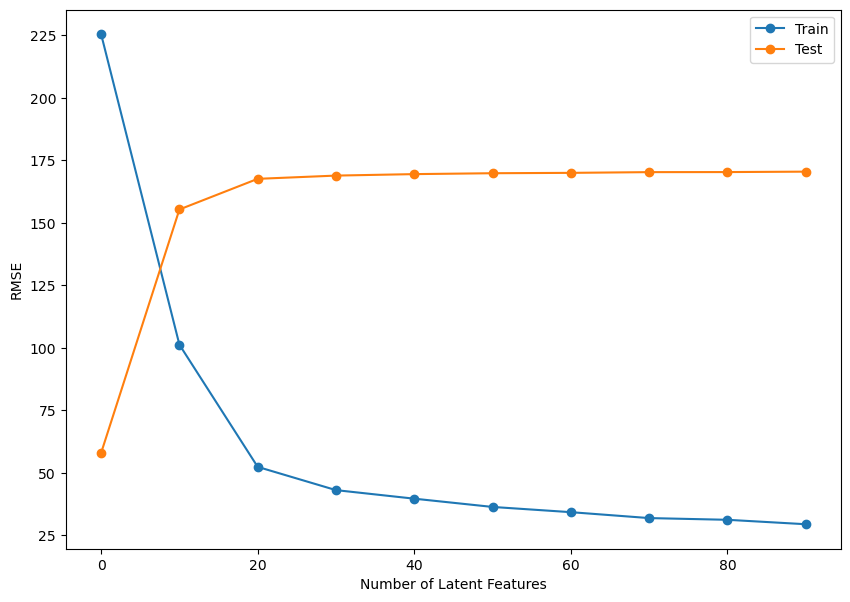

In [112]:
#Choose the best K - number of latent features
latent_features = np.arange(0, 100, 10) 
train_error = []
test_error = []

for k in latent_features:
    #Slicing the U, S, and Vt matrices to get k latent features from train and test data 
    s_train_lat, u_train_lat, vt_train_lat = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :] #take a particular portion of the matrix based on a latent features
    u_test_lat, vt_test_lat = u_test[:, :k], vt_test[:k, :]
    
    #Regenerating train and test interaction matrices using k latent features
    #interactions_matrix_train_preds = np.around(np.matmul(np.matmul(u_train_lat, s_train_lat), vt_train_lat))
    #interactions_matrix_test_preds = np.around(np.matmul(np.matmul(u_test_lat, s_train_lat), vt_test_lat))
    interactions_matrix_train_preds = np.dot(np.dot(u_train_lat, s_train_lat), vt_train_lat)
    interactions_matrix_test_preds = np.dot(np.dot(u_test_lat, s_train_lat), vt_test_lat)
    
    
    #Calculating the actual and predicted number of unique users for each song in the training data
    #number of interactions
    #!!!To improve inside interaction matrix can be sum of (normalized number of total interactions by song_id) + 
    # +(normalized number of unique users interacted with this song).
    
    num_unique_users_interacted_train = interactions_matrix_train.sum(axis=0)   #was mean, !!would prefer my variant above - but calculation is time consuming
    num_unique_users_interacted_train_pred = interactions_matrix_train_preds.sum(axis=0)
    
    #Calculating the actual and predicted *number of unique users* for each song in the test data
    #number of interactions
    num_unique_users_interacted_test = interactions_matrix_test.sum(axis=0)
    num_unique_users_interacted_test_pred = interactions_matrix_test_preds.sum(axis=0)
    
    #Calculating train and test RMSE
    train_rmse = mean_squared_error(num_unique_users_interacted_train, num_unique_users_interacted_train_pred, squared=False)
    test_rmse = mean_squared_error(num_unique_users_interacted_test, num_unique_users_interacted_test_pred, squared=False)
    
    train_error.append(train_rmse)
    test_error.append(test_rmse)
    
#Plotting train and test RMSE
plt.figure(figsize=(10,7))
plt.plot(latent_features, train_error, label='Train', marker='o');
plt.plot(latent_features, test_error, label='Test', marker='o');
plt.xlabel('Number of Latent Features');
plt.ylabel('RMSE');
plt.legend();

In [113]:
vt_train.shape

(3735, 3735)

In [114]:

k = 6
s_train_lat, u_train_lat, vt_train_lat = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
u_test_lat, vt_test_lat = u_test[:, :k], vt_test[:k, :]

In [115]:
vt_train_lat.shape

(6, 3735)

In [116]:
interactions_matrix_train_preds = np.dot(np.dot(u_train_lat, s_train_lat), vt_train_lat)
interactions_matrix_test_preds = np.dot(np.dot(u_test_lat, s_train_lat), vt_test_lat)

In [117]:
interactions_matrix_train_preds_SVD=pd.DataFrame(interactions_matrix_train_preds, index = match_idx, columns=match_cols)
interactions_matrix_train_preds_SVD.index.names = ["user_id"]
interactions_matrix_train_preds_SVD.columns.names = ["song_id"]
interactions_matrix_train_preds_SVD

song_id,1,2,3,4,5,6,7,8,9,10,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,0.000900,0.000025,0.000143,0.000422,0.000996,0.000405,0.011809,0.003002,0.000124,0.000215,...,0.000156,0.000460,0.000512,0.000314,0.001780,0.000655,0.000110,0.000131,0.000094,0.000233
26,0.000272,0.000010,0.000062,0.000122,0.000277,0.000124,0.003837,0.000564,0.000052,0.000097,...,0.000049,0.000149,0.000193,0.000121,0.000238,0.000286,0.000036,0.000036,0.000035,0.000072
29,0.000231,0.000008,0.000053,0.000100,0.000233,0.000099,0.003176,0.000480,0.000044,0.000084,...,0.000039,0.000123,0.000161,0.000102,0.000203,0.000247,0.000030,0.000030,0.000029,0.000059
52,0.000599,0.000022,0.000142,0.000262,0.000609,0.000255,0.008168,0.001262,0.000115,0.000213,...,0.000103,0.000322,0.000422,0.000264,0.000558,0.000662,0.000077,0.000079,0.000076,0.000154
78,0.009100,0.000107,0.000554,0.000515,0.004326,0.001027,0.109641,0.001294,0.002116,0.006222,...,0.000462,0.002739,0.003798,0.003829,-0.012477,0.004925,0.000947,0.000363,0.000407,0.001085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,0.001840,0.000094,0.000689,0.000959,0.002210,0.000836,0.023344,0.005389,0.000371,0.000506,...,0.000355,0.001070,0.001540,0.000832,0.003118,0.002958,0.000227,0.000278,0.000305,0.000496
71756,0.000522,0.000021,0.000140,0.000269,0.000598,0.000264,0.007274,0.001463,0.000094,0.000146,...,0.000102,0.000302,0.000391,0.000224,0.000803,0.000609,0.000069,0.000079,0.000073,0.000145
71778,0.000713,0.000026,0.000162,0.000351,0.000771,0.000334,0.009982,0.001682,0.000123,0.000213,...,0.000135,0.000404,0.000506,0.000308,0.000933,0.000754,0.000095,0.000104,0.000093,0.000202


In [118]:
# Singular Value Decomposition
U, sigma, Vt = u[:, :k], np.diag(s[:k]), vt[:k, :]
print("U= ", U)
print("Sigma= ",sigma)
print("Vt= ",Vt)

# Construct diagonal array in SVD
#sigma = np.diag(sigma)

U=  [[ 6.72521582e-04 -8.65102123e-05  1.25261733e-03 -8.07128004e-04
  -2.48497421e-04 -2.69287942e-04]
 [ 2.65390292e-04 -8.65149563e-04  6.28853887e-04 -3.27412594e-04
   5.74295893e-04 -4.20478708e-04]
 [ 2.17028523e-04 -1.37729815e-04  5.76947673e-04 -5.65129287e-04
   1.23589211e-03 -1.66792968e-04]
 ...
 [ 7.40543416e-04 -2.41277556e-04  2.16839219e-03 -3.18291919e-03
   5.63586232e-03 -3.22282300e-04]
 [ 9.04459325e-04 -1.58892992e-04  1.23743655e-03 -8.80466159e-05
   4.90827085e-04 -1.28815038e-03]
 [ 1.81280504e-04 -6.41786706e-05  4.77804817e-04 -7.53048954e-05
   8.55469824e-05 -5.47700863e-04]]
Sigma=  [[536.60138116   0.           0.           0.           0.
    0.        ]
 [  0.         422.43493182   0.           0.           0.
    0.        ]
 [  0.           0.         374.76358136   0.           0.
    0.        ]
 [  0.           0.           0.         318.86587549   0.
    0.        ]
 [  0.           0.           0.           0.         313.55095318
    0.   

In [119]:
Sigma_df = pd.DataFrame(sigma)
Sigma_df
Sigma_diag_array = np.diag(Sigma_df)

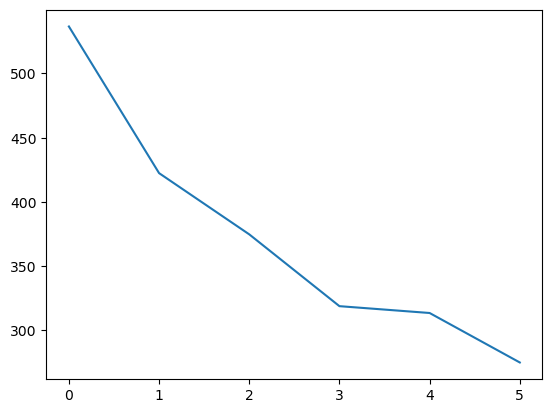

In [120]:
plt.plot(Sigma_diag_array) # plotting by columns
plt.show()

In [121]:
all_user_predicted_counts = np.dot(np.dot(U, sigma), Vt)

# Predicted ratings
preds_df = pd.DataFrame(abs(all_user_predicted_counts), columns = interactions_matrix_SVD_replace.columns, index = interactions_matrix_SVD_replace.index)
preds_df

song_id,0,1,2,3,4,5,6,7,8,9,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,0.000225,0.001134,0.000058,0.000294,0.000645,0.001499,0.000554,0.020276,0.004611,0.000181,...,0.000197,0.000755,0.001174,0.000469,0.001945,0.001067,0.000146,0.000487,0.000166,0.000272
26,0.000187,0.000696,0.000074,0.000274,0.000301,0.000718,0.000329,0.009981,0.001809,0.000145,...,0.000146,0.000387,0.001522,0.000311,0.000653,0.000920,0.000079,0.000407,0.000125,0.000166
29,0.000197,0.000525,0.000065,0.000286,0.000223,0.000601,0.000279,0.006900,0.001166,0.000145,...,0.000129,0.000311,0.000730,0.000285,0.000548,0.001034,0.000061,0.000192,0.000117,0.000158
52,0.001449,0.002885,0.000488,0.001741,0.002098,0.006606,0.003421,0.072646,0.027411,0.000973,...,0.001145,0.002867,0.004088,0.002147,0.004706,0.005771,0.000664,0.001618,0.001428,0.000891
78,0.001280,0.011069,0.002007,0.001082,0.000375,0.008009,0.002021,0.162552,0.007645,0.003025,...,0.002083,0.004851,0.008030,0.004646,0.008394,0.010570,0.001489,0.001284,0.000530,0.001687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,0.001879,0.006799,0.000552,0.002654,0.003538,0.008029,0.003424,0.110683,0.018531,0.001439,...,0.001389,0.004492,0.008278,0.003291,0.008929,0.009715,0.000842,0.002814,0.001166,0.001912
71756,0.000423,0.001521,0.000164,0.000624,0.000653,0.001512,0.000712,0.021794,0.003334,0.000331,...,0.000322,0.000863,0.003230,0.000703,0.001326,0.002141,0.000172,0.000858,0.000269,0.000382
71778,0.000831,0.002023,0.000233,0.001237,0.000926,0.002407,0.001109,0.024258,0.004545,0.000566,...,0.000500,0.001183,0.002614,0.001114,0.002329,0.004350,0.000219,0.000695,0.000481,0.000651


In [122]:
preds_df.max()

song_id
0       0.091444
1       0.351841
2       0.034102
3       0.145510
4       0.212163
          ...   
3773    0.489058
3774    0.048085
3775    0.217867
3776    0.078245
3777    0.088425
Length: 3778, dtype: float64

In [123]:
#Build the function to recommend top songs 

def recommend_songs(user_idx, interactions_matrix, preds_df, num_recommendations):
          
    # Get and sort the user's ratings from the actual and predicted interaction matrix
    sorted_user_ratings = interactions_matrix.loc[user_idx].sort_values(ascending=False) #how much time our user listened his songs
    sorted_user_predictions = preds_df.loc[user_idx].sort_values(ascending=False) #prediction - how much time our user is going to listen all songs
        
    #Creating a dataframe with actual and predicted ratings columns
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Songs'
    temp.columns = ['user_ratings', 'user_predictions'] 
    #print("temp=", temp)
    
    #Filtering the dataframe where actual ratings are 0 which implies that the user has not interacted with that movie
    #print(temp.loc[temp.user_ratings != 0])
    temp = temp.loc[temp.user_ratings == 0]  ###!!!!!Добавить нужно былоа!!!! 
    
    #Recommending movies with top predicted ratings
    temp = temp.sort_values('user_predictions', ascending=False)
    #print("temp sorted", temp)
    #temp["title"]=""
    #temp["title"]=temp.index.map(df["title"])
    #print("temp final = ", temp)
    #print('\nBelow are the recommended songs for user(user_id = {}):\n'.format(user_idx))
    #print(temp['user_predictions'].head(num_recommendations))
    
    return temp[:num_recommendations].index.tolist()

In [124]:
 #Recommend songs to some user using the function defined above
 user_index = 78
 num_recommendations = 10

 recommend_songs(user_index, interactions_matrix_SVD_replace, preds_df, num_recommendations)

[2685, 3247, 648, 2222, 1583, 1756, 2396, 1993, 3001, 2991]

In [125]:
# #Recommend songs to some user using the function defined above
user_index = 78
num_recommendations = 5

rec  =recommend_songs(user_index, interactions_matrix_SVD_replace, preds_df, num_recommendations)
print(rec)
song_names_from_song_id(rec)

[2685, 3247, 648, 2222, 1583]

Recommended Songs:


,count_sum,listen_count,title,release,artist_name,year
song_id,,,,,,
2685,8864,3032,Alejandro,The Fame Monster,Lady GaGa,2009
3247,10329,2076,16 Candles,16 Candles,The Crests,1988
648,3065,1072,Crawling (Album Version),Hybrid Theory,Linkin Park,2000
2222,6544,1988,You've Got The Love,Lungs,Florence + The Machine,2009
1583,9048,3372,The Scientist,The Scientist,Coldplay,2002


In [126]:
# #Recommend songs to some user using the function defined above
user_index = 78
num_recommendations = 10

rec = recommend_songs(user_index, interactions_matrix_SVD_replace, preds_df, num_recommendations)
print(rec)
song_names_from_song_id(rec)

[2685, 3247, 648, 2222, 1583, 1756, 2396, 1993, 3001, 2991]

Recommended Songs:


,count_sum,listen_count,title,release,artist_name,year
song_id,,,,,,
2685,8864,3032,Alejandro,The Fame Monster,Lady GaGa,2009
3247,10329,2076,16 Candles,16 Candles,The Crests,1988
648,3065,1072,Crawling (Album Version),Hybrid Theory,Linkin Park,2000
2222,6544,1988,You've Got The Love,Lungs,Florence + The Machine,2009
1583,9048,3372,The Scientist,The Scientist,Coldplay,2002
1756,8728,3009,Bulletproof,Bulletproof,La Roux,2009
2396,6708,1275,Sayonara-Nostalgia,Yuugata Generation,Base Ball Bear,2005
1993,6923,2070,Bring Me To Life,Fallen,Evanescence,2003
3001,6372,2316,Heartbreak Warfare,Battle Studies,John Mayer,0


In [127]:
# #Recommend songs to some user using the function defined above
# user_index = 42239
# num_recommendations = 10

# rec=recommend_songs(user_index, interactions_matrix_SVD_replace, preds_df, num_recommendations)
# print(rec)
# song_names_from_song_id(rec)

In [128]:
#Create a dataframe containing average actual and average predicted play_counts of the songs and calculate the RMSE
rmse_df = pd.concat([interactions_matrix_SVD_replace.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_play_counts', 'Avg_predicted_play_counts']
rmse_df

,Avg_actual_play_counts,Avg_predicted_play_counts
song_id,,
0,0.0084,0.000878
1,0.0266,0.005836
2,0.0038,0.000415
3,0.0142,0.001126
4,0.0122,0.002337
...,...,...
3773,0.0488,0.004609
3774,0.0056,0.000618
3775,0.0188,0.001801


In [129]:
r2_score(rmse_df.Avg_actual_play_counts, rmse_df.Avg_predicted_play_counts)

0.6044055490977099

In [130]:
RMSE = mean_squared_error(rmse_df['Avg_actual_play_counts'], rmse_df['Avg_predicted_play_counts'], squared=False)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.029663293461574553 



In [131]:
#Probably DONT NEED
#Split Data into Train and Test DataSets 80/20
df_train, df_test = train_test_split(df_small, test_size=0.2, random_state=10) #can use df_small instead of df

print(df_train.shape, df_test.shape)

#create train and test interaction matrices
interactions_matrix_train = df_train.pivot(index='user_id', columns='song_id', values='listen_count')
interactions_matrix_train.fillna(0, inplace=True)

interactions_matrix_test = df_test.pivot(index='user_id', columns='song_id', values='listen_count')
interactions_matrix_test.fillna(0, inplace=True)

print(interactions_matrix_train.shape, interactions_matrix_test.shape)

(194739, 7) (48685, 7)
(5000, 3778) (4998, 3735)


In [132]:
#PROBABLY DONT NEED
#Finding intersection between these matrices
#train and test matrices should have the same users, the same songs (to be comparable)

#Finding unique users in train and test data and then taking their intersection i.e. common users in train and test data 
train_idx = set(interactions_matrix_train.index)
test_idx = set(interactions_matrix_test.index)
match_idx = train_idx.intersection(test_idx)
match_idx=sorted(match_idx)
    
#Finding unique songs in train and test data and then taking their intersection i.e. common movies in train and test data 
train_songs = set(interactions_matrix_train.columns)
test_songs = set(interactions_matrix_test.columns)
match_cols = train_songs.intersection(test_songs)
match_cols=sorted(match_cols)

#Selecting only common users and songs from the test interaction matrix
interactions_matrix_test = interactions_matrix_test.loc[match_idx, match_cols]
interactions_matrix_test.shape

#Selecting only common users and songs from the TRAIN interaction matrix
interactions_matrix_train = interactions_matrix_train.loc[match_idx, match_cols]
interactions_matrix_train.shape

(4998, 3735)

In [133]:
interactions_matrix_test

song_id,1,2,3,4,5,6,7,8,9,10,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
#INTERACTION MATRIX FOR MATRIX FACTORIZATIN COLLABORATIVE FILTERING - PREDICTION on TRAIN SET
#==============================================================================================
interactions_matrix_train_preds_SVD.index.names = ["user_id"]
interactions_matrix_train_preds_SVD.columns.names = ["song_id"]
interactions_matrix_train_preds_SVD

song_id,1,2,3,4,5,6,7,8,9,10,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,0.000900,0.000025,0.000143,0.000422,0.000996,0.000405,0.011809,0.003002,0.000124,0.000215,...,0.000156,0.000460,0.000512,0.000314,0.001780,0.000655,0.000110,0.000131,0.000094,0.000233
26,0.000272,0.000010,0.000062,0.000122,0.000277,0.000124,0.003837,0.000564,0.000052,0.000097,...,0.000049,0.000149,0.000193,0.000121,0.000238,0.000286,0.000036,0.000036,0.000035,0.000072
29,0.000231,0.000008,0.000053,0.000100,0.000233,0.000099,0.003176,0.000480,0.000044,0.000084,...,0.000039,0.000123,0.000161,0.000102,0.000203,0.000247,0.000030,0.000030,0.000029,0.000059
52,0.000599,0.000022,0.000142,0.000262,0.000609,0.000255,0.008168,0.001262,0.000115,0.000213,...,0.000103,0.000322,0.000422,0.000264,0.000558,0.000662,0.000077,0.000079,0.000076,0.000154
78,0.009100,0.000107,0.000554,0.000515,0.004326,0.001027,0.109641,0.001294,0.002116,0.006222,...,0.000462,0.002739,0.003798,0.003829,-0.012477,0.004925,0.000947,0.000363,0.000407,0.001085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,0.001840,0.000094,0.000689,0.000959,0.002210,0.000836,0.023344,0.005389,0.000371,0.000506,...,0.000355,0.001070,0.001540,0.000832,0.003118,0.002958,0.000227,0.000278,0.000305,0.000496
71756,0.000522,0.000021,0.000140,0.000269,0.000598,0.000264,0.007274,0.001463,0.000094,0.000146,...,0.000102,0.000302,0.000391,0.000224,0.000803,0.000609,0.000069,0.000079,0.000073,0.000145
71778,0.000713,0.000026,0.000162,0.000351,0.000771,0.000334,0.009982,0.001682,0.000123,0.000213,...,0.000135,0.000404,0.000506,0.000308,0.000933,0.000754,0.000095,0.000104,0.000093,0.000202


In [135]:
#ALL ACTUAL SONGS are INCLUDED ======FROM preds_df and full interaction matrix and interactions_matrix_SVD
#Counting Precision and Recall for EACH USER -> into the Precision_matrix, Recall_matrix - for THIS MODEL (SVD)

k_max = 41
columns_k = np.arange(10,k_max,10) #can be np.arange(5,41,5)

Precision_Matrix_MODEL_SVD = pd.DataFrame(columns=columns_k, index = match_idx) #Precision by users for k
Recall_Matrix_MODEL_SVD = pd.DataFrame(columns=columns_k, index = match_idx) #Recall by users for k


def non_match_elements(list_a, list_b):
    non_match = []
    for i in list_a:
        if i not in list_b:
            non_match.append(i)
    return non_match

def match_elements(list_a, list_b):
    match = []
    for i in list_a:
        if i in list_b:
            match.append(i)
    return match


for user in np.array(match_idx):  #([11, 17]): # match_idx: #for each user
    #print("USER=============", user)
    
    user_vector_actual=interactions_matrix_SVD.loc[user] #actual from testing set
    actual_v = user_vector_actual.drop(user_vector_actual[user_vector_actual == 0].index).sort_values(ascending=False)
    actual=actual_v.index.tolist()
    
    user_vector_predicted = preds_df.loc[user] #predicion from training set
    predicted_v = user_vector_predicted.drop(user_vector_predicted[user_vector_predicted == 0].index).sort_values(ascending=False)
    predicted=predicted_v.index.tolist()
        
        
    for k in columns_k:
        #print("\nk=",k)
        #print("\n++++predicted[:k]",predicted[:k])
        #print("\n\n=====actual",actual)
        match = match_elements(predicted[:k], actual) #list of true positives
        #print("\nMATCH",match)
        precision = len(match)/k
        #print("\nprecision",precision)
        #put prcision in matrix at row = user, column = k
        Precision_Matrix_MODEL_SVD.at[user, k] = precision
        #recall = len(match)/len(actual.index.tolist())
        recall = len(match)/len(actual)
        #print("\nrecall",recall)
        #put recall in matrix
        Recall_Matrix_MODEL_SVD.at[user, k] = recall

In [136]:
Precision_Matrix_MODEL_SVD

,10,20,30,40
15,0.1,0.05,0.033333,0.025
26,0.0,0.0,0.0,0.0
29,0.0,0.0,0.033333,0.025
52,0.1,0.05,0.033333,0.025
78,0.3,0.3,0.3,0.275
...,...,...,...,...
71750,0.3,0.15,0.1,0.1
71756,0.0,0.0,0.0,0.0
71778,0.1,0.05,0.066667,0.05
71789,0.1,0.05,0.033333,0.05


In [137]:
Mean_Precision_Matrix_SVD = Precision_Matrix_MODEL_SVD.mean()
Mean_Precision_Matrix_SVD

10    0.177691
20    0.143357
30    0.129819
40    0.117022
dtype: float64

In [138]:
Recall_Matrix_MODEL_SVD

,10,20,30,40
15,0.017241,0.017241,0.017241,0.017241
26,0.0,0.0,0.0,0.0
29,0.0,0.0,0.030303,0.030303
52,0.011236,0.011236,0.011236,0.011236
78,0.069767,0.139535,0.209302,0.255814
...,...,...,...,...
71750,0.03,0.03,0.03,0.04
71756,0.0,0.0,0.0,0.0
71778,0.015873,0.015873,0.031746,0.031746
71789,0.014706,0.014706,0.014706,0.029412


In [139]:
Mean_Recall_Matrix_SVD = Recall_Matrix_MODEL_SVD.mean()
Mean_Recall_Matrix_SVD

10    0.040024
20    0.064013
30    0.086521
40    0.103489
dtype: float64

# clustering based recommendation 

In [140]:
sse = [] #Empty list to store the sum of squared errors for each value of k

for k in range(2, 40, 3):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(interactions_matrix_replace)
    sse.append(kmeans.inertia_)

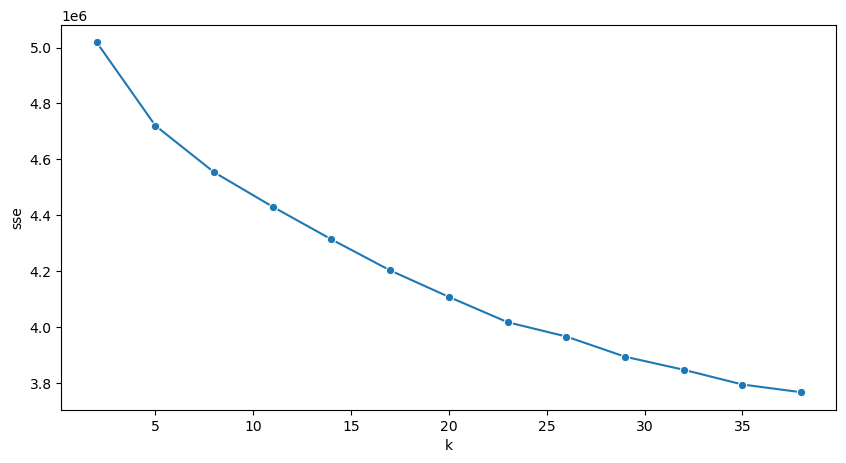

In [141]:
#Plotting elbow plot

error_data = pd.DataFrame({'k':range(2, 40, 3), 'sse':sse})

plt.figure(figsize=(10,5))

sns.lineplot(x='k', y='sse', data=error_data, marker='o')

plt.show()

In [142]:
interactions_matrix_replace #users/songs interaction matrix 5000 top users / 5000 top song_ids

song_id,0,1,2,3,4,5,6,7,8,9,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71756,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
k_clust = 6

In [144]:
def find_most_played_songs(interaction_matrix, num_songs):
    
    #Complete the function
    
    #Appending the count of ratings for each movie as a row in the interaction matrix
    user_song_most_played = interactions_matrix.append(interactions_matrix.sum(), ignore_index=True)
    
    #Sorting the values in the interaction matrix on the basis of the appended row (sum)
    user_song_most_played_sorted = user_song_most_played.sort_values(user_song_most_played.shape[0]-1, axis=1, ascending=False)
    
    #Dropping the appended row from the sorted interaction matrix
    user_song_most_played_sorted.drop(user_song_most_played_sorted.tail(1).index, inplace=True)
    
    #Selecting top songs with the most played number
    most_played_songs = user_song_most_played_sorted.iloc[:, :num_songs]
                                                    
        
    return most_played_songs

In [145]:
#Use the function defined above to find the 30 most played songs
most_played_songs = find_most_played_songs(interactions_matrix_replace, 30)
most_played_songs

song_id,230,2808,2080,3236,1583,414,1756,3508,2222,2361,...,687,3014,1718,3196,3457,2195,1627,2801,2743,2396
0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,9.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,NaN,NaN,2.0,NaN,NaN,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
#Use the function defined above to find the 1000 most played songs
most_played_songs_1k = find_most_played_songs(interactions_matrix_replace, 1000)
most_played_songs_1k

song_id,230,2808,2080,3236,1583,414,1756,3508,2222,2361,...,387,2460,2146,1991,2349,126,1679,2231,2507,317
0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,NaN,9.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,NaN,NaN,2.0,NaN,NaN,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
def find_most_interacted_users(most_played_songs, num_users):
    
    #Complete the function
    #Finding how many of the top 30 songs have been played by the user 
    most_played_songs['counts'] = pd.Series(most_played_songs.sum(axis=1))
    
    #Sorting the dataframe by the new 'counts' columns
    most_played_songs_users = most_played_songs.sort_values('counts', ascending=False)
    
    #Selecting top users with the most number of played songs
    most_played_songs_users_selected = most_played_songs_users.iloc[:num_users, :]
    
    #Dropping the 'counts' column
    most_played_songs_users_selected.drop(['counts'], axis=1, inplace=True)
    
      
    return most_played_songs_users_selected

In [148]:
#Use the function defined above to find the 20 most interacted users for 30 most played songs
most_played_songs_users_selected = find_most_interacted_users(most_played_songs, 20)
most_played_songs_users_selected

song_id,230,2808,2080,3236,1583,414,1756,3508,2222,2361,...,687,3014,1718,3196,3457,2195,1627,2801,2743,2396
1499,NaN,9.0,144.0,5.0,49.0,44.0,46.0,11.0,5.0,39.0,...,4.0,27.0,NaN,7.0,70.0,NaN,2.0,1.0,NaN,87.0
225,43.0,36.0,35.0,150.0,4.0,4.0,5.0,5.0,8.0,5.0,...,4.0,4.0,NaN,8.0,6.0,4.0,3.0,4.0,4.0,25.0
184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2113,271.0,15.0,35.0,8.0,4.0,3.0,1.0,4.0,NaN,2.0,...,NaN,1.0,NaN,6.0,1.0,NaN,NaN,3.0,NaN,NaN
3945,NaN,NaN,20.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,...,38.0,NaN,NaN,2.0,NaN,NaN,31.0,NaN,61.0,NaN
4104,13.0,194.0,9.0,2.0,5.0,3.0,4.0,2.0,7.0,2.0,...,3.0,2.0,NaN,5.0,7.0,1.0,5.0,3.0,2.0,5.0
2076,NaN,NaN,NaN,13.0,12.0,11.0,NaN,13.0,23.0,14.0,...,15.0,NaN,NaN,NaN,11.0,12.0,15.0,NaN,NaN,NaN
215,54.0,47.0,26.0,14.0,11.0,9.0,17.0,6.0,NaN,NaN,...,NaN,3.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1433,NaN,2.0,12.0,20.0,NaN,1.0,NaN,NaN,7.0,1.0,...,40.0,NaN,NaN,20.0,1.0,NaN,29.0,NaN,NaN,NaN
739,33.0,111.0,9.0,4.0,3.0,1.0,1.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN


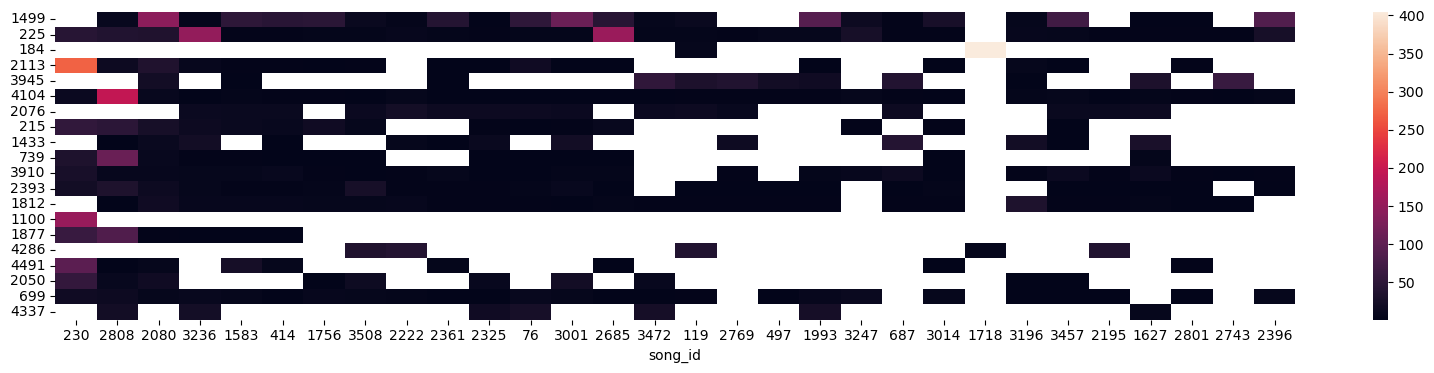

In [149]:
#Use heatmap to visualize the above output i.e. the most played songs by most interacted users
figure = plt.figure(figsize=(20, 4))
sns.heatmap(most_played_songs_users_selected);

In [150]:
#Use the function defined above to find the 5000 most interacted users for 30 most played songs
most_played_songs_users_selected = find_most_interacted_users(most_played_songs, 5000)
most_played_songs_users_selected

song_id,230,2808,2080,3236,1583,414,1756,3508,2222,2361,...,687,3014,1718,3196,3457,2195,1627,2801,2743,2396
1499,NaN,9.0,144.0,5.0,49.0,44.0,46.0,11.0,5.0,39.0,...,4.0,27.0,NaN,7.0,70.0,NaN,2.0,1.0,NaN,87.0
225,43.0,36.0,35.0,150.0,4.0,4.0,5.0,5.0,8.0,5.0,...,4.0,4.0,NaN,8.0,6.0,4.0,3.0,4.0,4.0,25.0
184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2113,271.0,15.0,35.0,8.0,4.0,3.0,1.0,4.0,NaN,2.0,...,NaN,1.0,NaN,6.0,1.0,NaN,NaN,3.0,NaN,NaN
3945,NaN,NaN,20.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,...,38.0,NaN,NaN,2.0,NaN,NaN,31.0,NaN,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


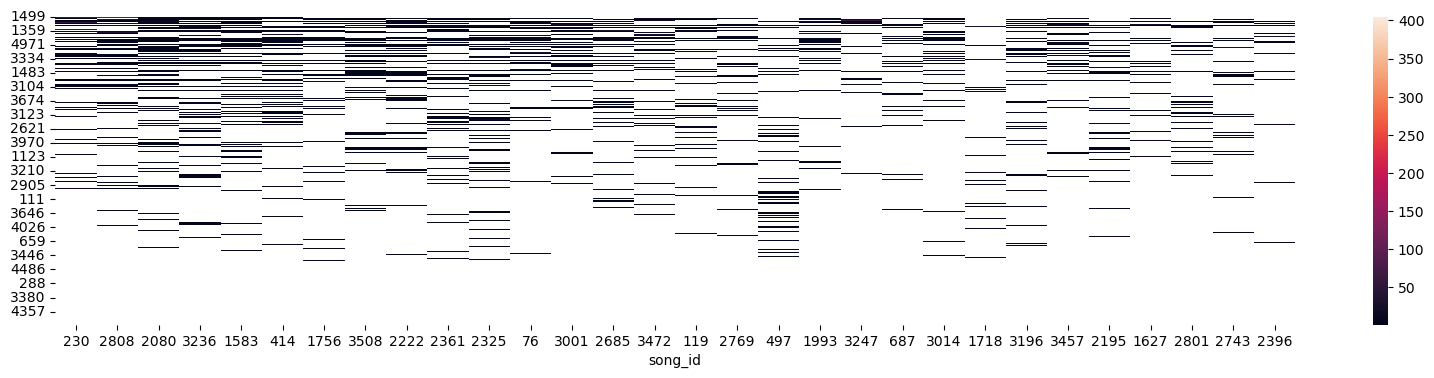

In [151]:
#Use heatmap to visualize the above output i.e. the most played songs by most interacted users
figure = plt.figure(figsize=(20, 4))
sns.heatmap(most_played_songs_users_selected);

In [152]:
predictions = KMeans(n_clusters=k_clust, random_state=0).fit_predict(interactions_matrix_replace) #Fit and predict using KMeans algorithm on the interaction matrix
results = pd.concat([most_played_songs_1k.reset_index(drop=True), pd.DataFrame({'group':predictions})], axis=1) #Concatenate most played songs data and the predictions 
results

,230,2808,2080,3236,1583,414,1756,3508,2222,2361,...,2460,2146,1991,2349,126,1679,2231,2507,317,group
0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1
4,NaN,9.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,NaN,NaN,2.0,NaN,NaN,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [153]:
#Check the count of users in each cluster
results['group'].value_counts()

1    4897
3      98
4       2
0       1
2       1
5       1
Name: group, dtype: int64

k= 2
1    4915
0      85
Name: group, dtype: int64


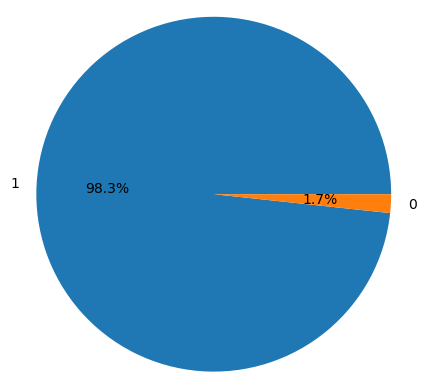

k= 3
0    4998
1       1
2       1
Name: group, dtype: int64


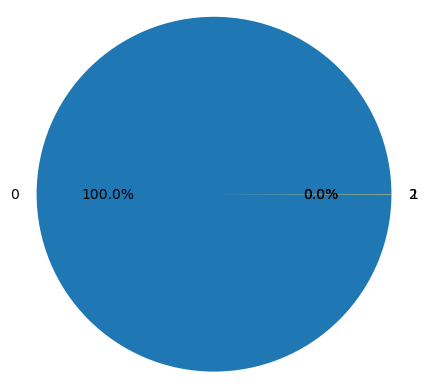

k= 4
3    4928
0      70
1       1
2       1
Name: group, dtype: int64


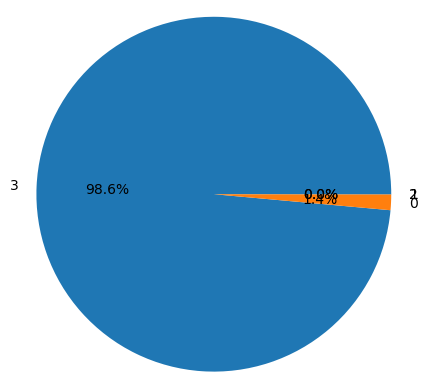

k= 5
2    4618
0     355
1      25
3       1
4       1
Name: group, dtype: int64


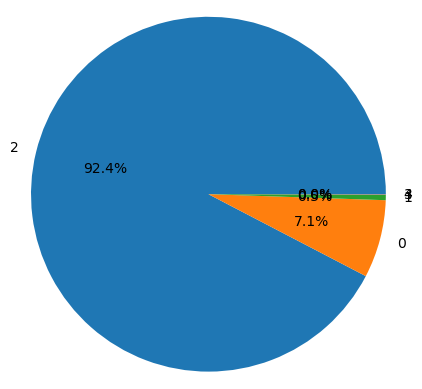

k= 6
1    4897
3      98
4       2
0       1
2       1
5       1
Name: group, dtype: int64


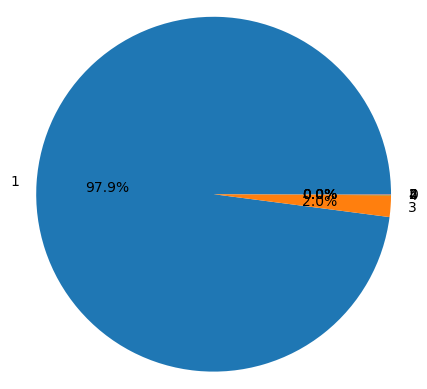

k= 7
5    4815
0     178
6       2
2       2
3       1
1       1
4       1
Name: group, dtype: int64


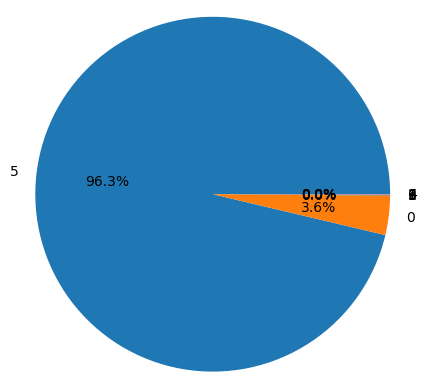

k= 8
0    4778
4     210
2       7
5       1
6       1
1       1
7       1
3       1
Name: group, dtype: int64


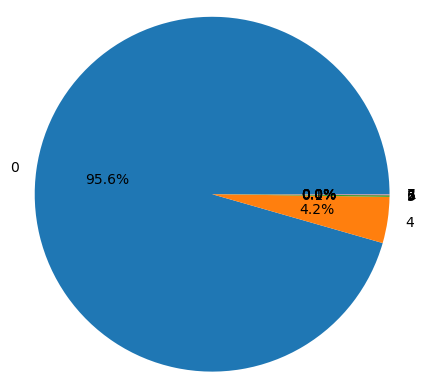

k= 9
2    4962
1      26
6       4
5       2
3       2
7       1
0       1
8       1
4       1
Name: group, dtype: int64


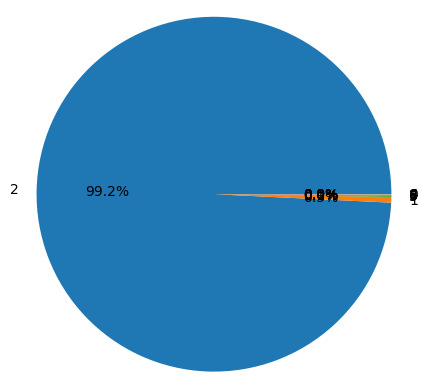

k= 10
0    4370
7     471
3     149
1       4
4       1
2       1
8       1
6       1
5       1
9       1
Name: group, dtype: int64


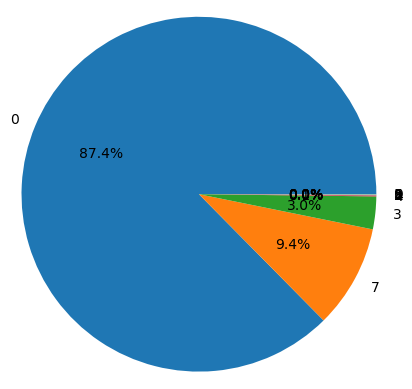

k= 11
9     4748
0      241
1        2
2        2
10       1
3        1
8        1
7        1
4        1
6        1
5        1
Name: group, dtype: int64


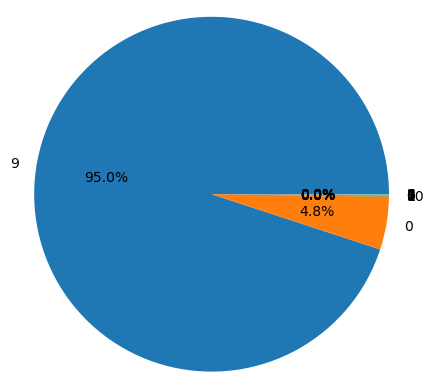

k= 12
7     4421
1      307
4      209
0       30
8       26
2        1
5        1
3        1
10       1
9        1
6        1
11       1
Name: group, dtype: int64


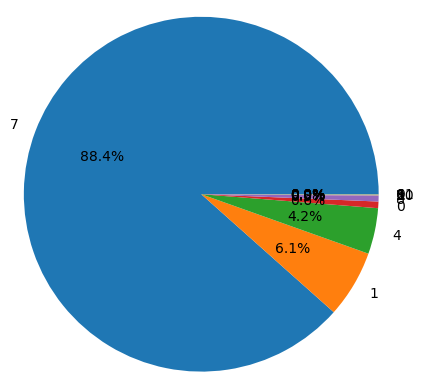

k= 13
4     4533
1      384
6       40
3       30
9        5
2        1
5        1
7        1
11       1
12       1
0        1
8        1
10       1
Name: group, dtype: int64


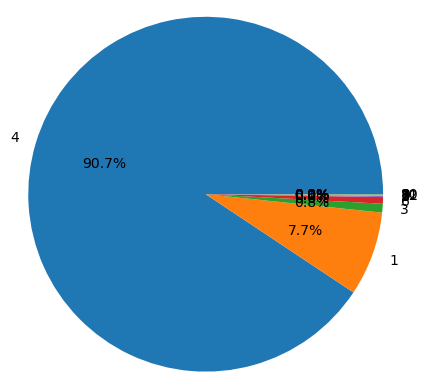

k= 14
1     4605
2      337
13      28
0       20
12       1
11       1
7        1
5        1
3        1
4        1
8        1
9        1
10       1
6        1
Name: group, dtype: int64


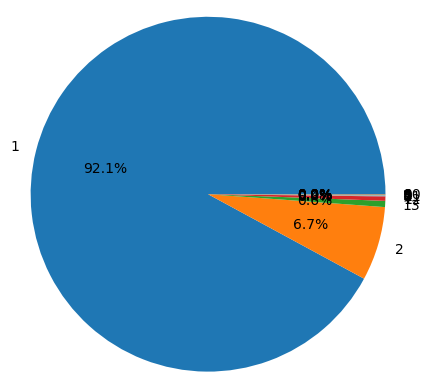

In [154]:
### Estimate clusters split for different K

for k in np.arange(2,15,1):
    print("k=",k)
    results1 = pd.DataFrame()
    predictions = KMeans(n_clusters=k, random_state=0).fit_predict(interactions_matrix_replace) #Fit and predict using KMeans algorithm on the interaction matrix
    results1 = pd.concat([most_played_songs_1k.reset_index(drop=True), pd.DataFrame({'group':predictions})], axis=1) #Concatenate most played songs data and the predictions 
    #print(results1)
    print(results1["group"].value_counts()) #-> записать в столбец/строку матрицы #
    plt.pie(results1["group"].value_counts(), autopct= '%.1f%%', radius = 1.2, labels = results1["group"].unique().tolist())
    plt.show()

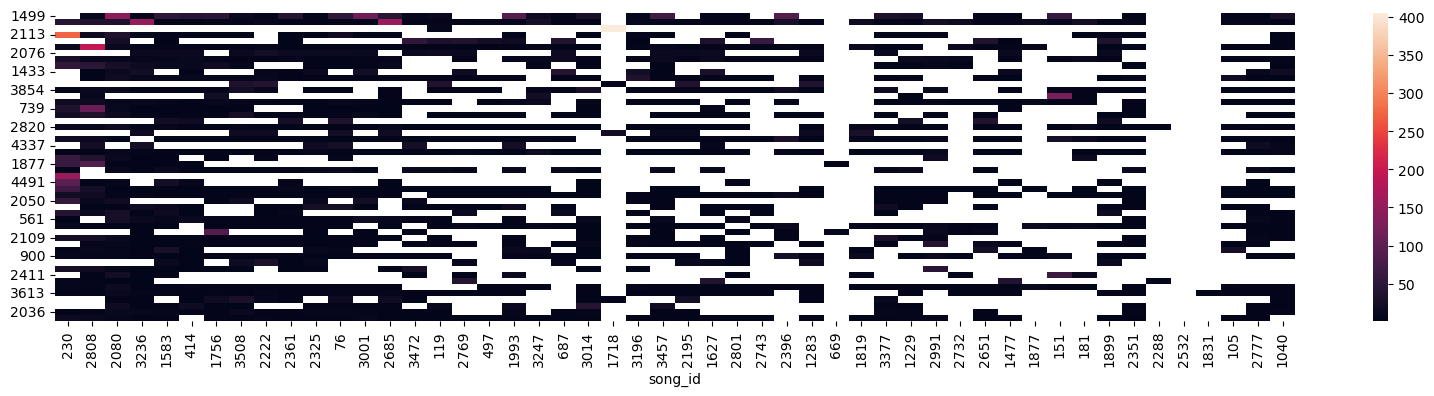

In [155]:
cluster_number = 1
n_users = 50
n_songs = 50

#Filter the results dataframe to extract users in the cluster
cluster_1_predictions = results[results.group == cluster_number].drop(['group'], axis=1)


#Find top 50 songs with the most number of interactions
cluster_1_songs = find_most_played_songs(cluster_1_predictions, n_songs)

#Finding top 50 users with the most number of interactions 
cluster_1_users = find_most_interacted_users(cluster_1_songs, n_users)

#Visualize using heatmap
figure = plt.figure(figsize=(20, 4))
sns.heatmap(cluster_1_users);

In [156]:
#Hint: use find_most_interacted_users function defined above from the largest cluster 1
find_most_interacted_users(cluster_1_predictions, 1).index

Int64Index([4286], dtype='int64')

In [157]:
num_of_top_songs = 5

In [158]:
#recommend top 5 songs based on clustering based recommendation systems
#In cluster 1, the user ID 2162 has listened to most number of songs.
user_id_ = 78
num_of_songs = 5

cluster_1_predictions.loc[78, :]

230        NaN
2808       3.0
2080       3.0
3236       NaN
1583       NaN
          ... 
1679       NaN
2231       NaN
2507       NaN
317        NaN
counts    85.0
Name: 78, Length: 1001, dtype: float64

In [159]:
user_id = 78

#Finding all the songs for user 2162
user_id_ratings  = cluster_1_predictions.loc[user_id, :]

#Finding not listened songs for user 2162
user_id_unrated_songs =  user_id_ratings[user_id_ratings.isnull()]

#Finding the average rating by users in cluster 1 for those not listened songs 
avg_ratings = pd.concat([user_id_unrated_songs, cluster_1_predictions.mean()], axis=1, join='inner').loc[:,0]

#Recommending top 20 songs
rec = avg_ratings.sort_values(ascending=False)[:20].index.tolist()
print(rec)
song_names_from_song_id(rec)

[1478, 582, 1437, 2512, 3389, 1521, 3119, 897, 3264, 2143, 2956, 118, 1656, 344, 1978, 684, 1402, 1206, 2474, 689]

Recommended Songs:


,count_sum,listen_count,title,release,artist_name,year
song_id,,,,,,
1478,3975,262,Clara meets Slope - Hard To Say,All I Can Provide,Clara Hill,2006
582,1102,180,Stuck Between,Voices In My Head,Riverside,0
1437,609,77,Fingers And Thumbs (Cold Summer's Day) (Sound ...,Pop! Remixed,Erasure,0
2512,973,135,Waiting For A Dream,Want,Rufus Wainwright,2004
3389,628,89,Writer's Block,Overtones,Just Jack,2006
1521,430,102,Salvation,The Way Of The Fist,Five Finger Death Punch,2007
3119,999,246,Untouchable,Fearless,Taylor Swift,2009
897,464,88,Todo O Tempo Do Mundo,Avenidas,Rui Veloso,1998
3264,468,109,Emerge,#1,Fischerspooner,2000


In [160]:
df_small['text'] = df_small["title"]+" "+df_small["release"]+" "+df_small["artist_name"]
df_small

#Use the smaller version of the original data to get the feature 'text'

,user_id,song_id,listen_count,title,release,artist_name,year,text
64,6567,14,1,Full Circle,Breakout,Miley Cyrus,2008,Full Circle Breakout Miley Cyrus
65,6567,55,2,Poor Jackie,Rabbit Habits,Man Man,2008,Poor Jackie Rabbit Habits Man Man
66,6567,126,1,Hot N Cold (Manhattan Clique Remix Radio Edit),Hot N Cold,Katy Perry,2008,Hot N Cold (Manhattan Clique Remix Radio Edit)...
67,6567,196,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
68,6567,208,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
...,...,...,...,...,...,...,...,...
720866,44971,3618,1,Just Friends,Back To Black,Amy Winehouse,2006,Just Friends Back To Black Amy Winehouse
720867,44971,3658,2,Sweet Pea,Supply And Demand,Amos Lee,2006,Sweet Pea Supply And Demand Amos Lee
720868,44971,3685,1,You Told A Lie,My Maudlin Career,Camera Obscura,0,You Told A Lie My Maudlin Career Camera Obscura
720869,44971,3717,1,He Can Only Hold Her,Back To Black,Amy Winehouse,2006,He Can Only Hold Her Back To Black Amy Winehouse


In [161]:
df_small_CB = df_small[["user_id", "song_id", "listen_count", "text"]]
df_small_CB  = df_small_CB.drop_duplicates(subset = ["song_id"])
df_small_CB = df_small_CB.set_index("song_id")
df_small_CB = df_small_CB.sort_index()
df_small_CB_index = df_small_CB.index
df_small_CB

,user_id,listen_count,text
song_id,,,
0,71756,1,Godlovesugly God Loves Ugly Atmosphere
1,54516,1,Rome Wasn't Built In A Day Parts Of The Proces...
2,5678,5,Stay Awhile Classic Dusty Springfield
3,49562,1,Nomenclature Noble Beast Andrew Bird
4,33070,1,Love Don't Live Here Anymore Rhino Hi-Five: Ro...
...,...,...,...
3773,25477,2,Watch The Tapes Sound Of Silver LCD Soundsystem
3774,52495,1,Si Una Vez La Leyenda Selena
3775,8662,1,Ruska Apocalyptica Apocalyptica


# CONTENT BASED RECOMMENDATION

In [162]:
#Checking first five indices
indices = pd.Series(df_small_CB.index)
indices[0:5]

0    0
1    1
2    2
3    3
4    4
Name: song_id, dtype: int64

In [163]:
import re #regular expression patterns
import nltk
#download all the nltk packages required here
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("punkt")
from nltk import word_tokenize #tokenization for spaces
from nltk.stem import WordNetLemmatizer #standartization
from nltk.corpus import stopwords #remove stop words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer #feature extraction

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [164]:

def tokenize(text):
    
    #Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ",text.lower())
    
    #Extracting each word in the text
    tokens = word_tokenize(text)
    
    #Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]
    
    #Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [165]:
#Apply TF-IDF transformation on the text column using the function defined above - using tfidf as a feature extraction technique
tfidf = TfidfVectorizer(tokenizer=tokenize)
song_tfidf = tfidf.fit_transform(df_small_CB['text'].values).toarray()

In [166]:
song_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [167]:
songs_features_df = pd.DataFrame(song_tfidf)
songs_features_df.index.names = ["song_id"]
songs_features_df.columns.names = ["text_features"]
songs_features_df.index = df_small_CB_index
songs_features_df

text_features,0,1,2,3,4,5,6,7,8,9,...,5127,5128,5129,5130,5131,5132,5133,5134,5135,5136
song_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
#printing this dataframe to excel 
#songs_features_df.to_excel("songs_features_df.xlsx")

In [169]:
#Find similar songs
similar_songs = cosine_similarity(song_tfidf, song_tfidf)
similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [170]:
similar_songs_df = pd.DataFrame(similar_songs)
similar_songs_df.index = df_small_CB_index
similar_songs_df.columns = df_small_CB_index
similar_songs_df

song_id,0,1,2,3,4,5,6,7,8,9,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
song_id,,,,,,,,,,,,,,,,,,,,,
0,1.00000,0.0,0.0,0.000000,0.03819,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.00000,1.0,0.0,0.000000,0.00000,0.0,0.137215,0.0,0.0,0.0,...,0.0,0.107516,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.00000,0.0,1.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.298119,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.00000,0.0,0.0,1.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.091831
4,0.03819,0.0,0.0,0.000000,1.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3773,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
3774,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000
3775,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000


In [171]:
#OLD VERSION
# Create a function that takes in song title as input and returns the top 10 recommended songs
nn=10

def recommendations_CB(song_id, similar_songs, nn):
    
    recommended_songs = []
    
    indices = pd.Series(df_small_CB.index)
    
    # getting the index of the song that matches the song_id
    idx = indices[indices == song_id].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)
    
    # getting the indices of 10 most similar songs
    #==========top_indexes = list(score_series.iloc[1:nn+1].index)
    top_indexes_series_all_users = score_series.iloc[1:]   

    top_indexes = score_series.iloc[1:nn+1].index.tolist()
    top_indexes
    
    # populating the list with the song_id of the best nn matching songs
    #for i in top_indexes:
    #    recommended_songs.append(list(df_small_CB.index)[i])
        
    return top_indexes, top_indexes_series_all_users

In [172]:
#Recommend TOP 10 songs for user 40 using the function defined above
recc, sss = recommendations_CB(40, similar_songs, 10)
print(recc)
song_names_from_song_id(recc)

[1204, 3760, 2740, 930, 2034, 616, 3112, 938, 1557, 862]

Recommended Songs:


,count_sum,listen_count,title,release,artist_name,year
song_id,,,,,,
1204,202,76,Finale,We Are Young Money,Young Money,2009
3760,628,223,Roger That,We Are Young Money,Young Money,2009
2740,395,162,EveryGirl In The World,We Are Young Money,Young Money,2009
930,115,67,Love vs. Money: Part 2,Love Vs Money,The-Dream,0
2034,185,93,Fancy,Love Vs Money,The-Dream,2009
616,191,118,Put It Down,Love Vs Money,The-Dream,2009
3112,164,99,Sweat It Out,Love Vs Money,The-Dream,2009
938,184,76,Kelly's 12 Play,Love Vs Money,The-Dream,2009
1557,155,86,Right Side Of My Brain,Love Vs Money,The-Dream,2009


# EVALUATION OF CONTENT BASED

In [173]:
#Split Data into Train and Test DataSets 80/20
df_train, df_test = train_test_split(df_small, test_size=0.2, random_state=10) #can use df_small instead of df

print(df_train.shape, df_test.shape)

#create train and test interaction matrices
interactions_matrix_train = df_train.pivot(index='user_id', columns='song_id', values='listen_count')
interactions_matrix_train.fillna(0, inplace=True)

interactions_matrix_test = df_test.pivot(index='user_id', columns='song_id', values='listen_count')
interactions_matrix_test.fillna(0, inplace=True)

print(interactions_matrix_train.shape, interactions_matrix_test.shape)

(194739, 8) (48685, 8)
(5000, 3778) (4998, 3735)


In [174]:
#Finding intersection between these matrices
#train and test matrices should have the same users, the same songs (to be comparable)

#Finding unique users in train and test data and then taking their intersection i.e. common users in train and test data 
train_idx = set(interactions_matrix_train.index)
test_idx = set(interactions_matrix_test.index)
match_idx = train_idx.intersection(test_idx)
match_idx=sorted(match_idx)
    
#Finding unique songs in train and test data and then taking their intersection i.e. common movies in train and test data 
train_songs = set(interactions_matrix_train.columns)
test_songs = set(interactions_matrix_test.columns)
match_cols = train_songs.intersection(test_songs)
match_cols=sorted(match_cols)

#Selecting only common users and songs from the test interaction matrix
interactions_matrix_test = interactions_matrix_test.loc[match_idx, match_cols]
interactions_matrix_test.shape

#Selecting only common users and songs from the TRAIN interaction matrix
interactions_matrix_train = interactions_matrix_train.loc[match_idx, match_cols]
interactions_matrix_train.shape

(4998, 3735)

In [175]:
interactions_matrix_test

song_id,1,2,3,4,5,6,7,8,9,10,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [176]:
#INTERACTION MATRIX FOR CONTENT-BASED FILTERING - PREDICTION on TRAIN SET
#==============================================================================================
#interactions_matrix_train_preds_CONTENT

In [177]:
similar_songs_df

song_id,0,1,2,3,4,5,6,7,8,9,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
song_id,,,,,,,,,,,,,,,,,,,,,
0,1.00000,0.0,0.0,0.000000,0.03819,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.00000,1.0,0.0,0.000000,0.00000,0.0,0.137215,0.0,0.0,0.0,...,0.0,0.107516,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.00000,0.0,1.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.298119,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.00000,0.0,0.0,1.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.091831
4,0.03819,0.0,0.0,0.000000,1.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3773,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
3774,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000
3775,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000


In [178]:
np.fill_diagonal(similar_songs_df.values, 0)
similar_songs_df

song_id,0,1,2,3,4,5,6,7,8,9,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
song_id,,,,,,,,,,,,,,,,,,,,,
0,0.00000,0.0,0.0,0.000000,0.03819,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.137215,0.0,0.0,0.0,...,0.0,0.107516,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.298119,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.091831
4,0.03819,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3773,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3774,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3775,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [179]:
interactions_matrix_pred_CONTENT = pd.DataFrame(0.0, columns = match_cols, index = match_idx) #match_cols instead top5000_most_played_songs
interactions_matrix_pred_CONTENT.index.names = ["user_id"]
interactions_matrix_pred_CONTENT.columns.names = ["song_id"]
interactions_matrix_pred_CONTENT

song_id,1,2,3,4,5,6,7,8,9,10,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

def Union(lst1, lst2):  #without repetition
    final_list = list(set(lst1) | set(lst2))
    return final_list

In [181]:
#NEW VERSIONbbbbb  - 3d Attempt  FINAL, I hope
# Create a function that takes in song title as input and returns the top 10 recommended songs

def recommendations_CB_full_series(song_id, similar_songs_df):
    
    recommended_songs = []
    
    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs_df[song_id]).sort_values(ascending = False)
    
    score_series = score_series[score_series>0]
    
    #score_series = score_series[score_series<1]
    
    # getting the indices of NON-ZERO-similarity-score similar songs
    #top_indexes = list(score_series.index)
    
    #top_indexes = intersection(top_indexes,match_cols)
        
    # populating the list with the song_id of the best nn matching songs
    #for i in top_indexes:
    #    recommended_songs.append(top_indexes)
        
        #>>> numbers = [1, 2, 3]
        #>>> numbers.append(4)
        #>>> numbers [1, 2, 3, 4]
        
        #Union(recommended_songs, list(df_small_CB.index)[i].tolist() )
        
    return score_series #recommended_songs

In [182]:
#CREATE INTERACTION MATRIX USER/SONGS: Recommendations for Content-Based Model

#For every user: 
    #find songs he actually listened
    #for every actual song -> find similar song
    #form series of similar song for this user
    #sort this series DESCENDING by similarity score, delete duplicates(if any)
    #Form PREDICION INTERACTION USER/SONG MATRIX

for user in match_idx: #match_idx: #np.array([32]): #match_idx:
    #print("\nUSER==============",user)
    recom = pd.Series()
    list_of_actual_songs_for_user = interactions_matrix_train.T[user]  #test->train
    list_of_actual_songs_for_user = list_of_actual_songs_for_user[list_of_actual_songs_for_user != 0]
    #print("list_of_actual_songs_for_user",list_of_actual_songs_for_user)
    for i in list_of_actual_songs_for_user.index: #find similar songs for all user's acutal songs
        new_recom = recommendations_CB_full_series(i, similar_songs_df) 
        #print("\nNew Recommendation for this user for sone_id=", i, " IS: ", new_recom, type(new_recom))
        recom = recom.append(new_recom)
        #print("\nOUR CUMULUTIVE SERIS OF SIMILAR SONGS\n", recom)
    #print("dirty recommendation\n", recom)
    
    #recom = remove_all_occurrences(recom, 1.0)
    
    recom.sort_values(ascending = False)  #- maybe do it later after dropping
    
    #print("sorted recommendations\n", recom) 
    #from recom delete duplicate indeces - keep only index with highest score
    recom = recom[~recom.index.duplicated(keep="first")] #remove duplicated indeces
        #put this recommendations for user to Recomendation Interactins Matrix CONTENT
    #recom.drop(labels = interactions_matrix_train.T[user].index.tolist(), errors='ignore')    #===============================================================================================
    #recom = recom.loc[recom.index.isin(interactions_matrix_train.T.index)] #delete not in training set
    #print("\nfinal recom for this user\n",user," is++++", recom)
    for song in recom.index:
        #print("\nvalue score of the song", song, " IS=====", recom[song])
        #print("\nrecom score==+++:", recom[song])
        #print("type of the song +++++++++:", type(song), type(user))
        interactions_matrix_pred_CONTENT.loc[user].at[song] = recom[song]
        #print("interactions_matrix_pred_CONTENT.at user =",user," song=", song, "=======",interactions_matrix_pred_CONTENT.loc[user].at[song])

In [183]:
interactions_matrix_pred_CONTENT

song_id,1,2,3,4,5,6,7,8,9,10,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,0.067676,0.000000,0.286795,0.046319,0.040063,0.135972,0.000000,0.0,0.096705,0.028307,...,0.108834,0.090280,0.000000,0.000000,0.168169,0.000000,0.000000,0.0,0.000000,0.090624
26,0.000000,0.000000,0.000000,0.000000,0.101090,0.000000,0.106176,0.0,0.000000,0.038236,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.108558,0.000000,0.0,0.000000,0.000000
29,0.000000,0.000000,0.000000,0.000000,0.040063,0.000000,0.000000,0.0,0.000000,0.028307,...,0.092539,0.000000,0.105727,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
52,0.097788,0.000000,0.112680,0.038399,0.052925,0.147560,0.297318,0.0,0.093767,0.054779,...,0.082098,0.130450,0.066200,0.000000,0.000000,0.000000,0.000000,0.0,0.150012,0.103085
78,0.087969,0.000000,0.000000,0.034814,0.053854,0.149767,0.077317,0.0,0.119874,0.073390,...,0.830925,0.117351,0.053373,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.156402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,0.000000,0.000000,0.000000,0.064947,0.157905,0.137215,0.810041,0.0,0.000000,0.068513,...,0.000000,0.107516,0.051818,0.158116,0.000000,0.000000,0.071666,0.0,0.000000,0.095253
71756,0.090300,0.000000,0.108462,0.038399,0.139631,0.153735,0.000000,0.0,0.092113,0.072706,...,0.063131,0.120460,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.084312
71778,0.182545,0.210304,0.000000,0.046627,0.104551,0.601950,0.070516,0.0,0.000000,0.039546,...,0.082098,0.243517,0.058103,0.000000,0.226873,0.000000,0.000000,0.0,0.000000,0.000000


content based model 

In [184]:
#Counting Precision and Recall for EACH USER -> into the Precision_matrix, Recall_matrix - for THIS MODEL (CONTENT-Based)

k_max = 41
columns_k = np.arange(10,k_max,10) #can be np.arange(5,41,5)

Precision_Matrix_MODEL_CONTENT = pd.DataFrame(columns=columns_k, index = match_idx) #Precision by users for k
Recall_Matrix_MODEL_CONTENT = pd.DataFrame(columns=columns_k, index = match_idx) #Recall by users for k


def non_match_elements(list_a, list_b):
    non_match = []
    for i in list_a:
        if i not in list_b:
            non_match.append(i)
    return non_match

def match_elements(list_a, list_b):
    match = []
    for i in list_a:
        if i in list_b:
            match.append(i)
    return match


for user in match_idx: #np.array([32542,75144,76342]):  #([11, 17]): # match_idx: #for each user
    #print("USER=============", user)
    user_vector_actual=interactions_matrix_test.loc[user] #actual from testing set
    actual_v = user_vector_actual.drop(user_vector_actual[user_vector_actual == 0].index).sort_values(ascending=False)
    actual=actual_v.index.tolist()
    
    #user_vector_predicted = recommend_songs(user, interactions_matrix_train, interactions_matrix_pred_CONTENT, k_max) #prediction from Training Set
    #predicted = user_vector_predicted
    
    user_vector_predicted = interactions_matrix_pred_CONTENT.loc[user] #actual from testing set #WAS interactions_matrix_test
    predicted_v = user_vector_predicted.drop(user_vector_predicted[user_vector_predicted == 0].index).sort_values(ascending=False)
    predicted=predicted_v.index.tolist()
        
        
    for k in columns_k:
        #print("\nk=",k)
        #print("\n++++predicted[:k]",predicted[:k])
        #print("\n\n=====actual",actual)
        match = match_elements(predicted[:k], actual) #list of true positives
        #print("\nMATCH",match)
        precision = len(match)/k
        #print("\nprecision",precision)
        #put prcision in matrix at row = user, column = k
        Precision_Matrix_MODEL_CONTENT.at[user, k] = precision
        #recall = len(match)/len(actual.index.tolist())
        recall = len(match)/len(actual)
        #print("\nrecall",recall)
        #put recall in matrix
        Recall_Matrix_MODEL_CONTENT.at[user, k] = recall

In [185]:
Precision_Matrix_MODEL_CONTENT

,10,20,30,40
15,0.0,0.0,0.0,0.0
26,0.0,0.05,0.066667,0.05
29,0.0,0.05,0.033333,0.025
52,0.2,0.15,0.1,0.075
78,0.0,0.0,0.033333,0.025
...,...,...,...,...
71750,0.0,0.0,0.066667,0.05
71756,0.0,0.05,0.066667,0.05
71778,0.3,0.15,0.1,0.1
71789,0.0,0.0,0.033333,0.025


In [186]:
Mean_Precision_Matrix_CONTENT = Precision_Matrix_MODEL_CONTENT.mean()
Mean_Precision_Matrix_CONTENT

10    0.054682
20    0.052181
30    0.049640
40    0.046168
dtype: float64

In [187]:
Recall_Matrix_MODEL_CONTENT

,10,20,30,40
15,0.0,0.0,0.0,0.0
26,0.0,0.142857,0.285714,0.285714
29,0.0,0.2,0.2,0.2
52,0.090909,0.136364,0.136364,0.136364
78,0.0,0.0,0.090909,0.090909
...,...,...,...,...
71750,0.0,0.0,0.105263,0.105263
71756,0.0,0.076923,0.153846,0.153846
71778,0.214286,0.214286,0.214286,0.285714
71789,0.0,0.0,0.142857,0.142857


In [188]:
Mean_Recall_Matrix_CONTENT = Recall_Matrix_MODEL_CONTENT.mean()
Mean_Recall_Matrix_CONTENT

10    0.061835
20    0.118359
30    0.167772
40    0.206840
dtype: float64

# HYBRID MODEL

## Step1.
## Apply Conent Based to train dataset. -> Get Interactions_Matrix_Prediction_CONTENT

In [189]:
interactions_matrix_pred_CONTENT

song_id,1,2,3,4,5,6,7,8,9,10,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,0.067676,0.000000,0.286795,0.046319,0.040063,0.135972,0.000000,0.0,0.096705,0.028307,...,0.108834,0.090280,0.000000,0.000000,0.168169,0.000000,0.000000,0.0,0.000000,0.090624
26,0.000000,0.000000,0.000000,0.000000,0.101090,0.000000,0.106176,0.0,0.000000,0.038236,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.108558,0.000000,0.0,0.000000,0.000000
29,0.000000,0.000000,0.000000,0.000000,0.040063,0.000000,0.000000,0.0,0.000000,0.028307,...,0.092539,0.000000,0.105727,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
52,0.097788,0.000000,0.112680,0.038399,0.052925,0.147560,0.297318,0.0,0.093767,0.054779,...,0.082098,0.130450,0.066200,0.000000,0.000000,0.000000,0.000000,0.0,0.150012,0.103085
78,0.087969,0.000000,0.000000,0.034814,0.053854,0.149767,0.077317,0.0,0.119874,0.073390,...,0.830925,0.117351,0.053373,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.156402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,0.000000,0.000000,0.000000,0.064947,0.157905,0.137215,0.810041,0.0,0.000000,0.068513,...,0.000000,0.107516,0.051818,0.158116,0.000000,0.000000,0.071666,0.0,0.000000,0.095253
71756,0.090300,0.000000,0.108462,0.038399,0.139631,0.153735,0.000000,0.0,0.092113,0.072706,...,0.063131,0.120460,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.084312
71778,0.182545,0.210304,0.000000,0.046627,0.104551,0.601950,0.070516,0.0,0.000000,0.039546,...,0.082098,0.243517,0.058103,0.000000,0.226873,0.000000,0.000000,0.0,0.000000,0.000000


In [190]:
interactions_matrix_train

song_id,1,2,3,4,5,6,7,8,9,10,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
interactions_matrix_test

song_id,1,2,3,4,5,6,7,8,9,10,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [192]:
u, s, vt = np.linalg.svd(interactions_matrix_replace.loc[match_idx, match_cols], full_matrices=False)

In [193]:
#We solved the problem of Cold Start (for new items or items with little interaction)
Ldiff_matrix = interactions_matrix_train - interactions_matrix_pred_CONTENT
#Ldiff_matrix = pd.DataFrame(abs(Ldiff_matrix))  #===================I added abs
Ldiff_matrix

song_id,1,2,3,4,5,6,7,8,9,10,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,-0.067676,0.000000,-0.286795,-0.046319,-0.040063,-0.135972,0.000000,0.0,-0.096705,-0.028307,...,-0.108834,-0.090280,0.000000,0.000000,-0.168169,0.000000,0.000000,0.0,0.000000,-0.090624
26,0.000000,0.000000,0.000000,0.000000,-0.101090,0.000000,-0.106176,0.0,0.000000,-0.038236,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.108558,0.000000,0.0,0.000000,0.000000
29,0.000000,0.000000,0.000000,0.000000,-0.040063,0.000000,0.000000,0.0,0.000000,-0.028307,...,-0.092539,0.000000,-0.105727,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
52,-0.097788,0.000000,-0.112680,-0.038399,-0.052925,-0.147560,-0.297318,0.0,-0.093767,-0.054779,...,-0.082098,-0.130450,-0.066200,0.000000,0.000000,0.000000,0.000000,0.0,-0.150012,-0.103085
78,-0.087969,0.000000,0.000000,-0.034814,-0.053854,-0.149767,-0.077317,1.0,-0.119874,-0.073390,...,-0.830925,-0.117351,-0.053373,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.156402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,1.000000,0.000000,0.000000,-0.064947,-0.157905,-0.137215,-0.810041,0.0,0.000000,-0.068513,...,0.000000,-0.107516,-0.051818,-0.158116,0.000000,0.000000,-0.071666,0.0,0.000000,-0.095253
71756,-0.090300,0.000000,-0.108462,-0.038399,-0.139631,-0.153735,0.000000,0.0,-0.092113,-0.072706,...,-0.063131,-0.120460,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.084312
71778,-0.182545,-0.210304,0.000000,-0.046627,-0.104551,-0.601950,-0.070516,0.0,0.000000,-0.039546,...,-0.082098,-0.243517,-0.058103,0.000000,-0.226873,0.000000,0.000000,0.0,0.000000,0.000000


# Step2.
## Hybrid = Content Based + SVD ->
 -> Interactions_Train_Actual - Interactions_Matrix_Prediction_CONTENT = Ldiff (we need to estimate with SVD)

In [194]:
u, s, vt = np.linalg.svd(Ldiff_matrix, full_matrices=False)

In [195]:
u.shape

(4998, 3735)

In [196]:
s.shape

(3735,)

In [197]:
vt.shape

(3735, 3735)

In [198]:
X_train, X_test = train_test_split(df_small, test_size=0.2, random_state=10)

In [199]:
X_train.shape

(194739, 8)

In [200]:
X_test.shape

(48685, 8)

In [201]:
#Train interaction matrix
interactions_matrix_train = X_train.pivot(index='user_id', columns='song_id', values='listen_count')
interactions_matrix_train.fillna(0, inplace=True)

In [202]:
interactions_matrix_train.shape

(5000, 3778)

In [203]:
#Test interaction matrix
interactions_matrix_test = X_test.pivot(index='user_id', columns='song_id', values='listen_count')
interactions_matrix_test.fillna(0, inplace=True)

In [204]:
interactions_matrix_test.shape

(4998, 3735)

In [205]:
#Finding unique users in train and test data and then taking their intersection i.e. common users in train and test data 
train_idx = set(interactions_matrix_train.index)
test_idx = set(interactions_matrix_test.index)
match_idx1 = train_idx.intersection(test_idx)
    
#Finding unique songs in train and test data and then taking their intersection i.e. common movies in train and test data 
train_ssongs = set(interactions_matrix_train.columns)
test_songs = set(interactions_matrix_test.columns)
match_cols1 = train_ssongs.intersection(test_songs)

#Selecting only common users and movies from the test interaction matrix
interactions_matrix_test = interactions_matrix_test.loc[match_idx1, match_cols1]

In [206]:
interactions_matrix_test.shape

(4998, 3735)

In [207]:
interactions_matrix_train=interactions_matrix_train.loc[match_idx, match_cols]
interactions_matrix_train

song_id,1,2,3,4,5,6,7,8,9,10,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [208]:
u_train, s_train, vt_train = np.linalg.svd(interactions_matrix_train, full_matrices=False)

In [209]:
#Finding u_test and vt_test matrices using u_train, vt_train and common user/movies in train and test data
row_idxs = interactions_matrix_train.index.isin(test_idx)
col_idxs = interactions_matrix_train.columns.isin(test_songs)
u_test = u_train[row_idxs, :]
vt_test = vt_train[:, col_idxs]

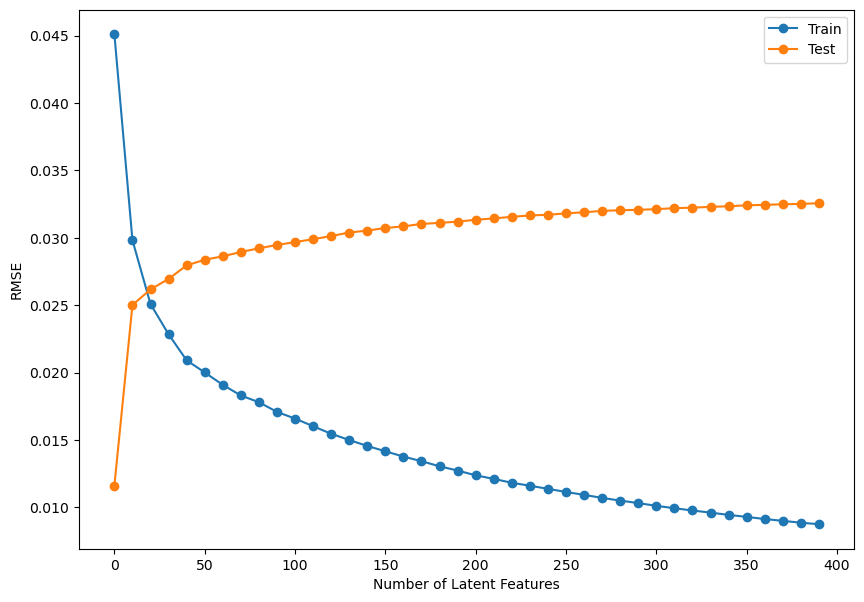

In [210]:
#Creating array for number of latent features and empty lists to store train and test errors
latent_features = np.arange(0, 400, 10) 
train_error = []
test_error = []

for k in latent_features:
    #Slicing the U, S, and Vt matrices to get k latent features from train and test data 
    s_train_lat, u_train_lat, vt_train_lat = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    u_test_lat, vt_test_lat = u_test[:, :k], vt_test[:k, :]
    
    #Regenerating train and test interaction matrices using k latent features
    interactions_matrix_train_preds = np.around(np.matmul(np.matmul(u_train_lat, s_train_lat), vt_train_lat))
    interactions_matrix_test_preds = np.around(np.matmul(np.matmul(u_test_lat, s_train_lat), vt_test_lat))
    
    #Calculating the actual and predicted average rating for each movie in the training data
    avg_rating_train = interactions_matrix_train.mean(axis=0)
    avg_rating_train_pred = interactions_matrix_train_preds.mean(axis=0)
    
    #Calculating the actual and predicted average rating for each movie in the test data
    avg_rating_test = interactions_matrix_test.mean(axis=0)
    avg_rating_test_pred = interactions_matrix_test_preds.mean(axis=0)
    
    #Calculating train and test RMSE
    train_rmse = mean_squared_error(avg_rating_train, avg_rating_train_pred, squared=False)
    test_rmse = mean_squared_error(avg_rating_test, avg_rating_test_pred, squared=False)
    
    train_error.append(train_rmse)
    test_error.append(test_rmse)
    
#Plotting train and test RMSE
plt.figure(figsize=(10,7))
plt.plot(latent_features, train_error, label='Train', marker='o');
plt.plot(latent_features, test_error, label='Test', marker='o');
plt.xlabel('Number of Latent Features');
plt.ylabel('RMSE');
plt.legend();

In [211]:
s_final, u_final, vt_final = np.diag(s[:10]), u[:, :10], vt[:10, :]
Ldiff_Predicted = np.around(np.matmul(np.matmul(u_final, s_final), vt_final))
Ldiff_Predicted = pd.DataFrame(abs(Ldiff_Predicted), columns = match_cols, index = match_idx)
Ldiff_Predicted

,1,2,3,4,5,6,7,8,9,10,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step 3.
## Building Hybrid_predicted from Content_Predicted and Ldiff_Predicted

In [212]:
#TOTAL PREDICTED
interactions_matrix_train_preds_HYBRID = interactions_matrix_pred_CONTENT + Ldiff_Predicted
interactions_matrix_train_preds_HYBRID

song_id,1,2,3,4,5,6,7,8,9,10,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,0.067676,0.000000,0.286795,0.046319,0.040063,0.135972,0.000000,0.0,0.096705,0.028307,...,0.108834,0.090280,0.000000,0.000000,0.168169,0.000000,0.000000,0.0,0.000000,0.090624
26,0.000000,0.000000,0.000000,0.000000,0.101090,0.000000,0.106176,0.0,0.000000,0.038236,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.108558,0.000000,0.0,0.000000,0.000000
29,0.000000,0.000000,0.000000,0.000000,0.040063,0.000000,0.000000,0.0,0.000000,0.028307,...,0.092539,0.000000,0.105727,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
52,0.097788,0.000000,0.112680,0.038399,0.052925,0.147560,0.297318,0.0,0.093767,0.054779,...,0.082098,0.130450,0.066200,0.000000,0.000000,0.000000,0.000000,0.0,0.150012,0.103085
78,0.087969,0.000000,0.000000,0.034814,0.053854,0.149767,0.077317,0.0,0.119874,0.073390,...,0.830925,0.117351,0.053373,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.156402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,0.000000,0.000000,0.000000,0.064947,0.157905,0.137215,0.810041,0.0,0.000000,0.068513,...,0.000000,0.107516,0.051818,0.158116,0.000000,0.000000,0.071666,0.0,0.000000,0.095253
71756,0.090300,0.000000,0.108462,0.038399,0.139631,0.153735,0.000000,0.0,0.092113,0.072706,...,0.063131,0.120460,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.084312
71778,0.182545,0.210304,0.000000,0.046627,0.104551,0.601950,0.070516,0.0,0.000000,0.039546,...,0.082098,0.243517,0.058103,0.000000,0.226873,0.000000,0.000000,0.0,0.000000,0.000000


In [213]:
#Build the function to recommend top songs 

def recommend_songs(user_idx, interactions_matrix, preds_df, num_recommendations):
          
    # Get and sort the user's ratings from the actual and predicted interaction matrix
    sorted_user_ratings = interactions_matrix.loc[user_idx].sort_values(ascending=False) #how much time our user listened his songs
    sorted_user_predictions = preds_df.loc[user_idx].sort_values(ascending=False) #prediction - how much time our user is going to listen all songs
        
    #Creating a dataframe with actual and predicted ratings columns
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Songs'
    temp.columns = ['user_ratings', 'user_predictions'] 
    #print("temp=", temp)
    
    #Filtering the dataframe where actual ratings are 0 which implies that the user has not interacted with that movie
    #print(temp.loc[temp.user_ratings != 0])
    temp = temp.loc[temp.user_ratings == 0]  ###!!!!!Добавить нужно былоа!!!! 
    
    #Recommending movies with top predicted ratings
    temp = temp.sort_values('user_predictions', ascending=False)
    #print("temp sorted", temp)
    #temp["title"]=""
    #temp["title"]=temp.index.map(df["title"])
    #print("temp final = ", temp)
    #print('\nBelow are the recommended songs for user(user_id = {}):\n'.format(user_idx))
    #print(temp['user_predictions'].head(num_recommendations))
    
    return temp[:num_recommendations].index.tolist()

In [214]:
 #Recommend songs to some user using the function defined above
 user_index = 78
 num_recommendations = 10

 rec = recommend_songs(user_index, interactions_matrix_train, interactions_matrix_train_preds_HYBRID, num_recommendations)
 print(rec)
 song_names_from_song_id(rec)

[3001, 2222, 3508, 648, 2991, 1819, 3247, 3559, 3472, 2325]

Recommended Songs:


,count_sum,listen_count,title,release,artist_name,year
song_id,,,,,,
3001,6372,2316,Heartbreak Warfare,Battle Studies,John Mayer,0
2222,6544,1988,You've Got The Love,Lungs,Florence + The Machine,2009
3508,7361,2224,Cosmic Love,Lungs,Florence + The Machine,2009
648,3065,1072,Crawling (Album Version),Hybrid Theory,Linkin Park,2000
2991,11371,1481,Make Love To Your Mind,Playlist: The Very Best Of Bill Withers,Bill Withers,1975
1819,5361,1219,Le Jardin d'Hiver,Smile,Jacky Terrasson,2002
3247,10329,2076,16 Candles,16 Candles,The Crests,1988
3559,3949,1395,All I Do Is Win (feat. T-Pain_ Ludacris_ Snoop...,Victory,DJ Khaled,2010
3472,5843,2029,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997


In [215]:
 #Recommend songs to some user using the function defined above
 user_index = 15
 num_recommendations = 5

 rec  = recommend_songs(user_index, interactions_matrix_train, interactions_matrix_train_preds_HYBRID, num_recommendations) 
 print(rec)
 song_names_from_song_id(rec)

[436, 2521, 3497, 3214, 2833]

Recommended Songs:


,count_sum,listen_count,title,release,artist_name,year
song_id,,,,,,
436,434,299,Monday Morning Cold (band),Monday Morning Cold,Erin McKeown,0
2521,276,165,Things,The Winter of Mixed Drinks,Frightened Rabbit,2010
3497,353,179,Nothing Like You,The Winter of Mixed Drinks,Frightened Rabbit,2010
3214,178,130,The Wizard,Fur And Gold,Bat For Lashes,2006
2833,262,170,FootShooter,The Winter of Mixed Drinks,Frightened Rabbit,2010


In [216]:
 #Recommend songs to some user using the function defined above
 user_index = 71750
 num_recommendations = 10

 rec = recommend_songs(user_index, interactions_matrix_train, interactions_matrix_train_preds_HYBRID, num_recommendations) 
 print(rec)
 song_names_from_song_id(rec)

[2808, 3543, 3001, 2272, 2912, 3748, 3182, 7, 2521, 1503]

Recommended Songs:


,count_sum,listen_count,title,release,artist_name,year
song_id,,,,,,
2808,41418,6145,Revelry,Only By The Night,Kings Of Leon,2008
3543,1413,440,The Police And The Private,Live It Out,Metric,2005
3001,6372,2316,Heartbreak Warfare,Battle Studies,John Mayer,0
2272,409,221,Lotus,Cage The Elephant,Cage The Elephant,2008
2912,1528,540,Infinity,xx,The xx,2009
3748,2402,854,Lasso,Wolfgang Amadeus Phoenix,Phoenix,0
3182,996,352,Armistice,Wolfgang Amadeus Phoenix,Phoenix,0
7,2318,923,Back Against The Wall,Cage The Elephant,Cage The Elephant,2008
2521,276,165,Things,The Winter of Mixed Drinks,Frightened Rabbit,2010


In [217]:
 #Recommend songs to some user using the function defined above
 user_index = 71789
 num_recommendations = 10

 rec=recommend_songs(user_index, interactions_matrix_train, interactions_matrix_train_preds_HYBRID, num_recommendations) 
 print(rec)
 song_names_from_song_id(rec)

[1302, 1721, 567, 1263, 762, 533, 3445, 318, 585, 686]

Recommended Songs:


,count_sum,listen_count,title,release,artist_name,year
song_id,,,,,,
1302,220,99,That Home,Ma Fleur,The Cinematic Orchestra,2007
1721,804,473,Lost,One Of The Boys,Katy Perry,2007
567,334,163,Getaway,Drops Of Jupiter,Train,2001
1263,685,317,Down River,Conditions,The Temper Trap,2009
762,662,256,Fools,Conditions,The Temper Trap,2009
533,132,72,Love Lost,Conditions,The Temper Trap,2009
3445,618,251,Rest,Conditions,The Temper Trap,2009
318,512,242,Resurrection,Conditions,The Temper Trap,2009
585,366,153,The Glory,Graduation,Kanye West,2007


In [218]:
#Create a dataframe containing average actual and average predicted play_counts of the songs and calculate the RMSE
rmse_df_HYBRID = pd.concat([interactions_matrix_train.mean(), interactions_matrix_train_preds_HYBRID.mean()], axis=1)
rmse_df_HYBRID.columns = ['Avg_actual_play_counts', 'Avg_predicted_play_counts_HYBRID']
rmse_df

,Avg_actual_play_counts,Avg_predicted_play_counts
song_id,,
0,0.0084,0.000878
1,0.0266,0.005836
2,0.0038,0.000415
3,0.0142,0.001126
4,0.0122,0.002337
...,...,...
3773,0.0488,0.004609
3774,0.0056,0.000618
3775,0.0188,0.001801


In [219]:
RMSE = mean_squared_error(rmse_df_HYBRID['Avg_actual_play_counts'], rmse_df_HYBRID['Avg_predicted_play_counts_HYBRID'], squared=False)
print('\nRMSE HYBRID Model = {} \n'.format(RMSE))


RMSE HYBRID Model = 0.04934643382492059 



In [220]:
#INTERACTION MATRIX FOR MATRIX FACTORIZATIN COLLABORATIVE FILTERING - PREDICTION on TRAIN SET
#==============================================================================================
interactions_matrix_train_preds_HYBRID

song_id,1,2,3,4,5,6,7,8,9,10,...,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777
user_id,,,,,,,,,,,,,,,,,,,,,
15,0.067676,0.000000,0.286795,0.046319,0.040063,0.135972,0.000000,0.0,0.096705,0.028307,...,0.108834,0.090280,0.000000,0.000000,0.168169,0.000000,0.000000,0.0,0.000000,0.090624
26,0.000000,0.000000,0.000000,0.000000,0.101090,0.000000,0.106176,0.0,0.000000,0.038236,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.108558,0.000000,0.0,0.000000,0.000000
29,0.000000,0.000000,0.000000,0.000000,0.040063,0.000000,0.000000,0.0,0.000000,0.028307,...,0.092539,0.000000,0.105727,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
52,0.097788,0.000000,0.112680,0.038399,0.052925,0.147560,0.297318,0.0,0.093767,0.054779,...,0.082098,0.130450,0.066200,0.000000,0.000000,0.000000,0.000000,0.0,0.150012,0.103085
78,0.087969,0.000000,0.000000,0.034814,0.053854,0.149767,0.077317,0.0,0.119874,0.073390,...,0.830925,0.117351,0.053373,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.156402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,0.000000,0.000000,0.000000,0.064947,0.157905,0.137215,0.810041,0.0,0.000000,0.068513,...,0.000000,0.107516,0.051818,0.158116,0.000000,0.000000,0.071666,0.0,0.000000,0.095253
71756,0.090300,0.000000,0.108462,0.038399,0.139631,0.153735,0.000000,0.0,0.092113,0.072706,...,0.063131,0.120460,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.084312
71778,0.182545,0.210304,0.000000,0.046627,0.104551,0.601950,0.070516,0.0,0.000000,0.039546,...,0.082098,0.243517,0.058103,0.000000,0.226873,0.000000,0.000000,0.0,0.000000,0.000000


hybrid model 

In [221]:
#Counting Precision and Recall for EACH USER -> into the Precision_matrix, Recall_matrix - for THIS MODEL (HYBRID)

k_max = 41
columns_k = np.arange(10,k_max,10) #can be np.arange(5,41,5)

Precision_Matrix_MODEL_HYBRID = pd.DataFrame(columns=columns_k, index = match_idx) #Precision by users for k
Recall_Matrix_MODEL_HYBRID = pd.DataFrame(columns=columns_k, index = match_idx) #Recall by users for k


def non_match_elements(list_a, list_b):
    non_match = []
    for i in list_a:
        if i not in list_b:
            non_match.append(i)
    return non_match

def match_elements(list_a, list_b):
    match = []
    for i in list_a:
        if i in list_b:
            match.append(i)
    return match


for user in np.array(match_idx):  #([11, 17]): # match_idx: #for each user
    #print("USER=============", user)
    user_vector_actual=interactions_matrix_test.loc[user] #actual from testing set #WAS interactions_matrix_test
    actual_v = user_vector_actual.drop(user_vector_actual[user_vector_actual == 0].index).sort_values(ascending=False)
    actual=actual_v.index.tolist()
    
    user_vector_predicted = interactions_matrix_train_preds_HYBRID.loc[user] #actual from testing set #WAS interactions_matrix_test
    predicted_v = user_vector_predicted.drop(user_vector_predicted[user_vector_predicted == 0].index).sort_values(ascending=False)
    predicted=predicted_v.index.tolist()
    
    #recommend_songs(user, interactions_matrix_test, interactions_matrix_train_preds_HYBRID, k_max) #prediction from Training Set #was train NOW REPLACE
    #predicted = user_vector_predicted
        
        
    for k in columns_k:
        #print("\nk=",k)
        #print("\n++++predicted[:k]",predicted[:k])
        #print("\n\n=====actual",actual)
        match = match_elements(predicted[:k], actual) #list of true positives
        #print("\nMATCH",match)
        precision = len(match)/k
        #print("\nprecision",precision)
        #put prcision in matrix at row = user, column = k
        Precision_Matrix_MODEL_HYBRID.at[user, k] = precision
        #recall = len(match)/len(actual.index.tolist())
        recall = len(match)/len(actual)
        #print("\nrecall",recall)
        #put recall in matrix
        Recall_Matrix_MODEL_HYBRID.at[user, k] = recall

In [222]:
Precision_Matrix_MODEL_HYBRID

,10,20,30,40
15,0.0,0.0,0.0,0.0
26,0.0,0.05,0.066667,0.05
29,0.0,0.05,0.033333,0.025
52,0.2,0.15,0.1,0.075
78,0.1,0.05,0.033333,0.05
...,...,...,...,...
71750,0.0,0.0,0.0,0.05
71756,0.0,0.05,0.066667,0.05
71778,0.3,0.15,0.1,0.1
71789,0.0,0.0,0.033333,0.025


In [223]:
Precision_Matrix_MODEL_HYBRID.sum()

10         286.6
20        280.25
30    268.033333
40        250.05
dtype: object

In [224]:
Mean_Precision_Matrix_HYBRID = Precision_Matrix_MODEL_HYBRID.mean()
Mean_Precision_Matrix_HYBRID

10    0.057343
20    0.056072
30    0.053628
40    0.050030
dtype: float64

In [225]:
Recall_Matrix_MODEL_HYBRID

,10,20,30,40
15,0.0,0.0,0.0,0.0
26,0.0,0.142857,0.285714,0.285714
29,0.0,0.2,0.2,0.2
52,0.090909,0.136364,0.136364,0.136364
78,0.090909,0.090909,0.090909,0.181818
...,...,...,...,...
71750,0.0,0.0,0.0,0.105263
71756,0.0,0.076923,0.153846,0.153846
71778,0.214286,0.214286,0.214286,0.285714
71789,0.0,0.0,0.142857,0.142857


In [226]:
Mean_Recall_Matrix_HYBRID = Recall_Matrix_MODEL_HYBRID.mean()
Mean_Recall_Matrix_HYBRID

10    0.065204
20    0.127616
30    0.181437
40    0.223843
dtype: float64

In [227]:
print("==========TIME OF CODE EXECUTION================","--- %s seconds ---" % (time.time() - start_time))

==========TIME OF CODE EXECUTION================ --- 1153.5649502277374 seconds ---


END 